In [2]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
def rho_red_light(nx, rho_max, rho_in):
    """Computes 'red light' ICs with shock
    
    Parameters:
    nx (int) - number of spatial grid points
    rho_max (float) - max. traffic density
    rho_in (float) - Density of incoming cars
    
    Returns: 
    rho (array of float) - array with initial values of density
    """
    rho = rho_max*numpy.ones(nx)
    rho[:(nx-1)*3/4] = rho_in
    return rho

In [4]:
#Parameters, ICs
nx = 81
nt = 30
dx = 4/(nx-1)

rho_in = 5
rho_max = 10
u_max = 1
x = numpy.linspace(0,4,nx)

rho = rho_red_light(nx, rho_max, rho_in)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


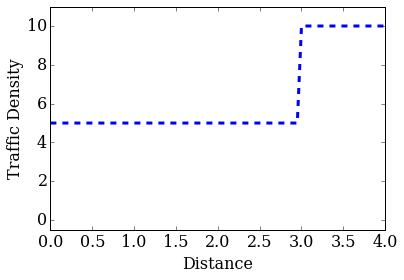

In [5]:
pyplot.plot(x, rho, ls='--', lw=3)
pyplot.ylabel('Traffic Density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 11);

In [6]:
def computeF(u_max, rho__max, rho):
    """Computes flux F = V*rho
    
    Parameters:
    u_max (float) - Maximum allowed velocity
    rho (array of float) - array with density of cars at each x
    rho_max (float) - maximum car density
    
    Returns:
    F (array) - Array of Flux at each x. 
    """
    return u_max*rho*(1-rho/rho_max)

In [7]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [8]:
def animate(data):
    x = numpy.linspace(0,4, nx)
    y = data
    line.set_data(x,y)
    return line, 

In [9]:
def laxfriedrichs(rho, nt, dt, dx, rho_max, u_max):
    """Computes a solution with Lax-Friedrichs scheme
    
    Parameters:
    rho - density
    nt - number of time steps
    dt - time discretization
    dx - space discretization
    rho_max - max density
    u_max - max velocity
    """
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    
    
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t, 1:-1] = 0.5*(rho[2:]+rho[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0]
        rho_n[t,-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [10]:
sigma = 1.0
dt = sigma*dx/u_max
rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



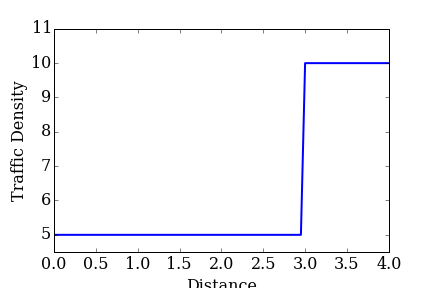
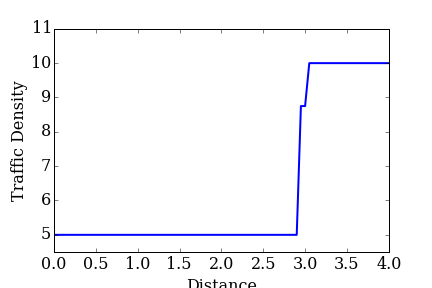
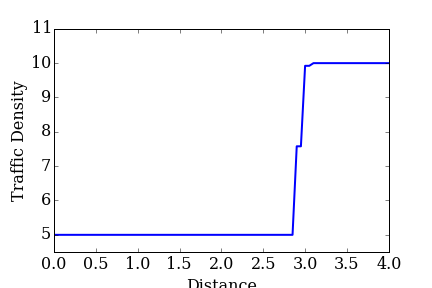
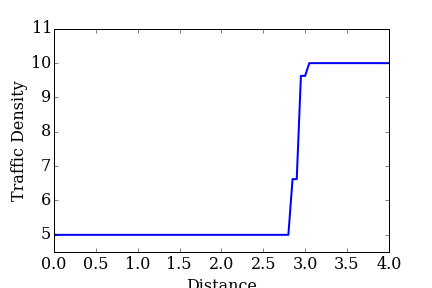
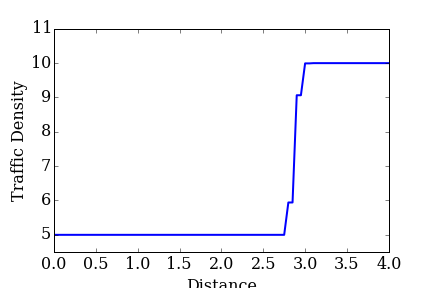
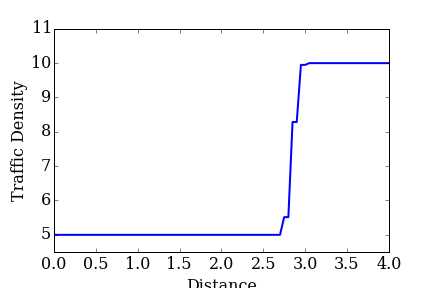
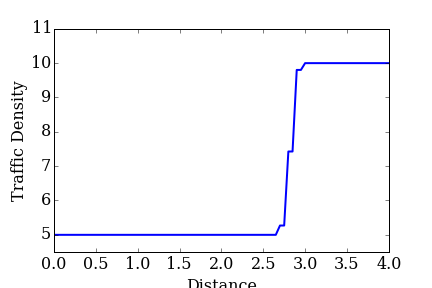
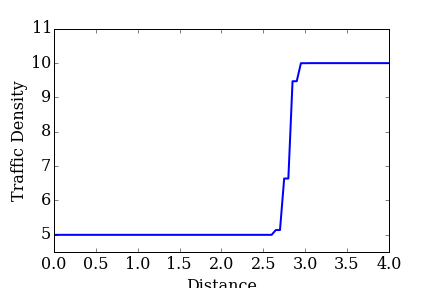
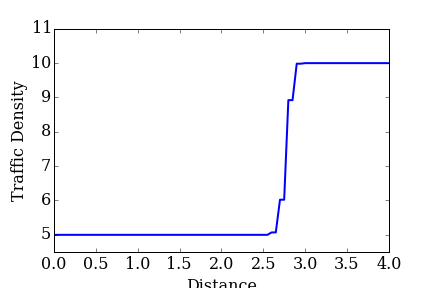
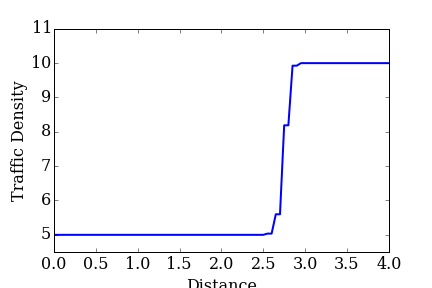
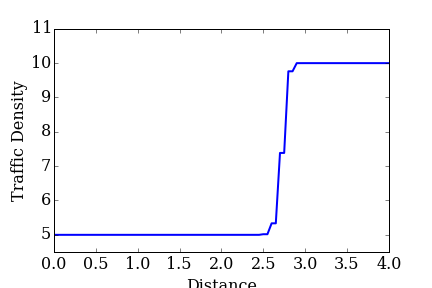
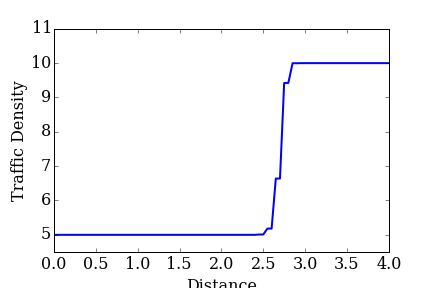
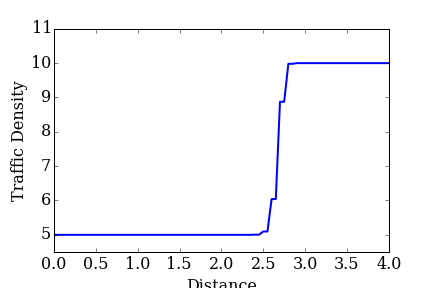
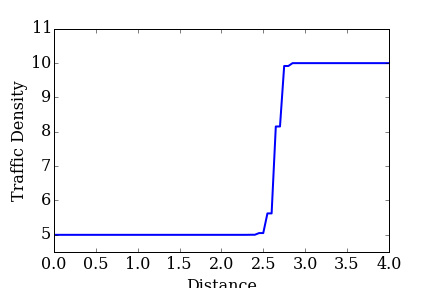
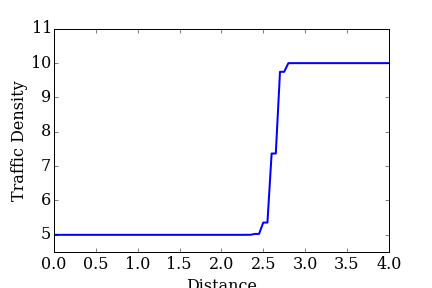
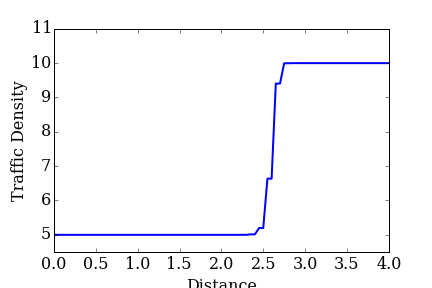
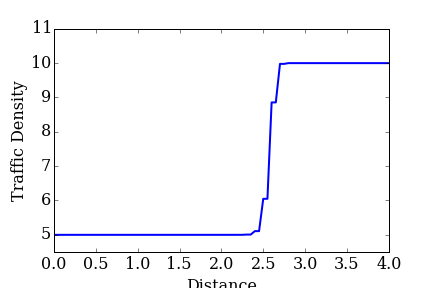
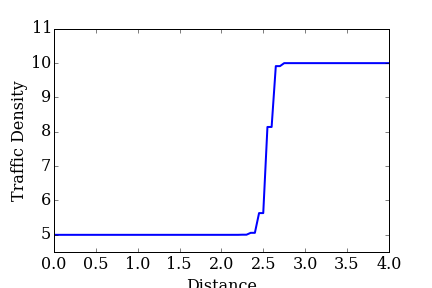
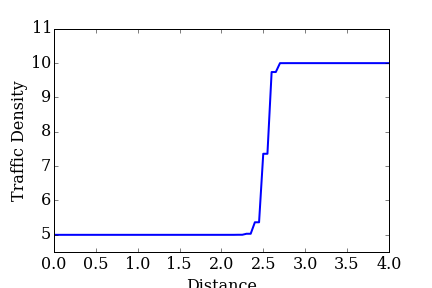
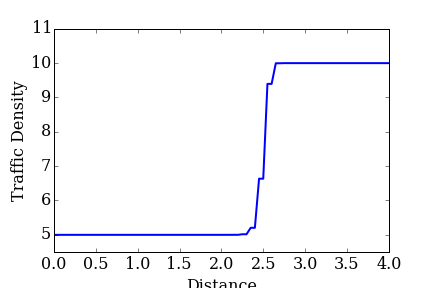
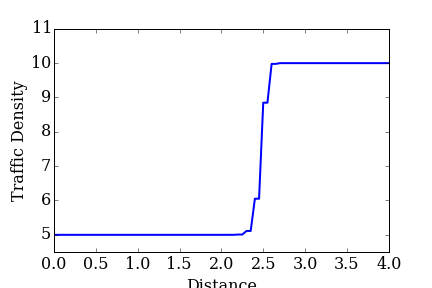
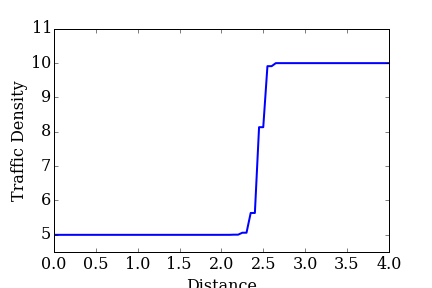
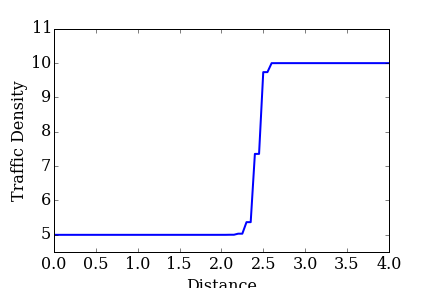
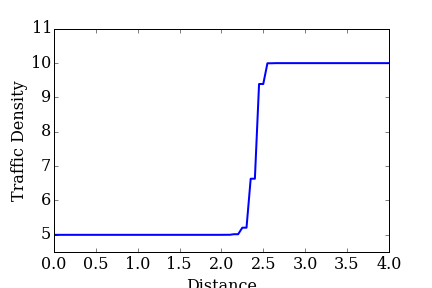
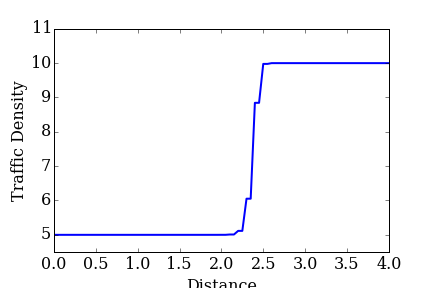
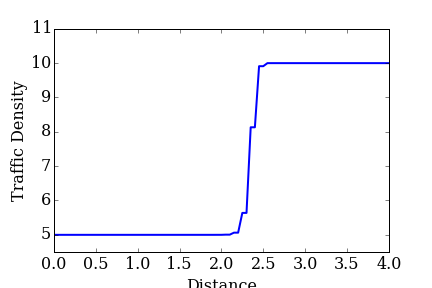
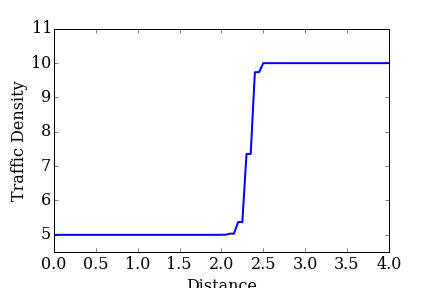
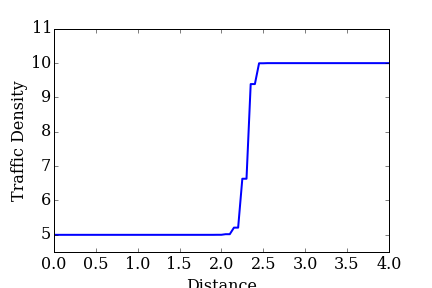
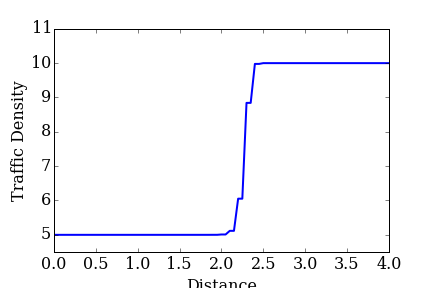
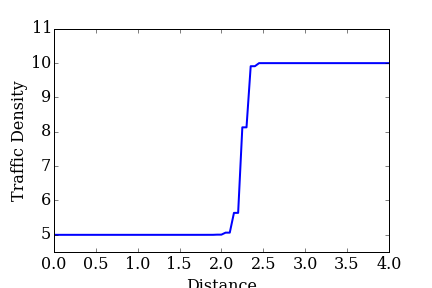

In [11]:
rho_n.shape

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(4.5, 11), xlabel=('Distance'), ylabel=('Traffic Density'))
line, = ax.plot([],[],lw=2)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



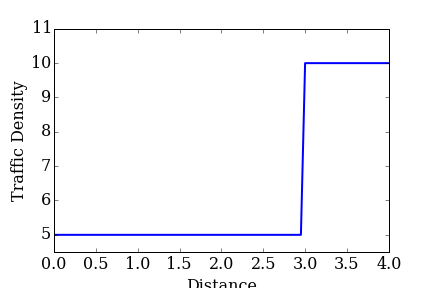
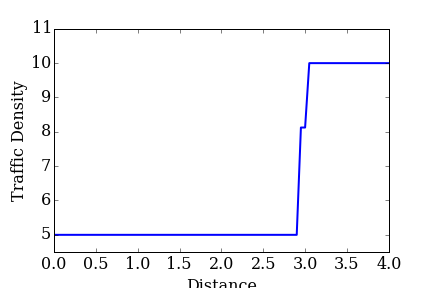
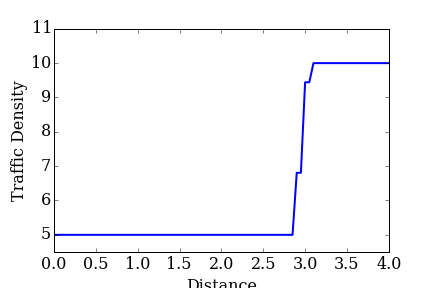
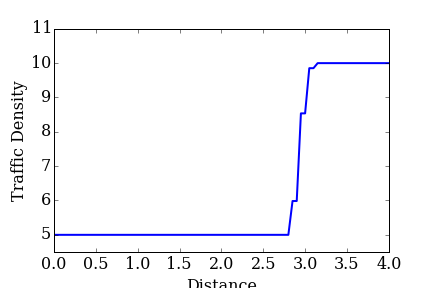
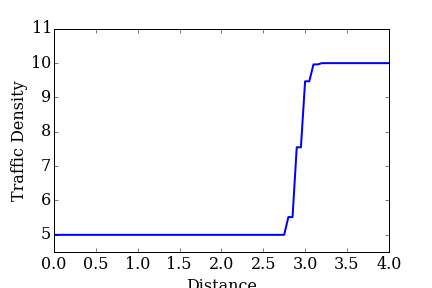
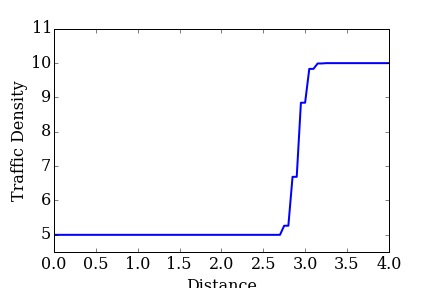
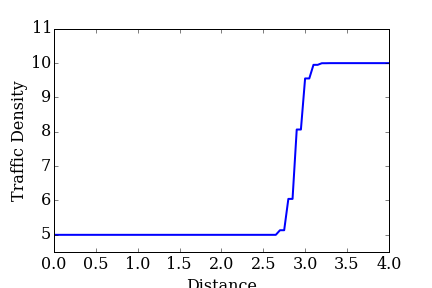
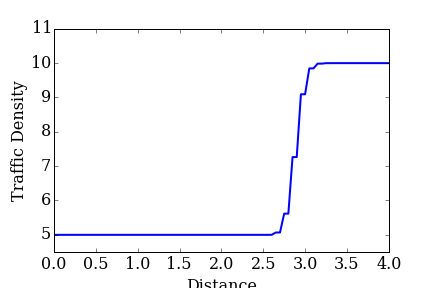
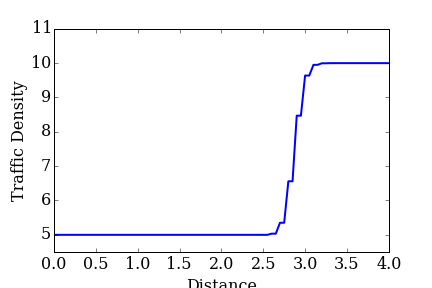
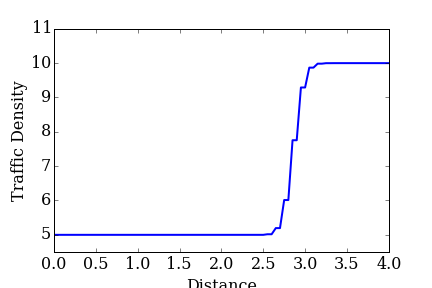
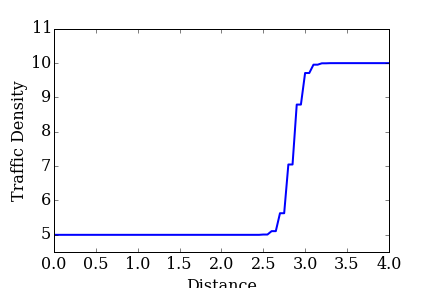
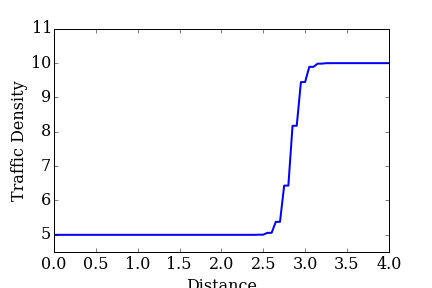
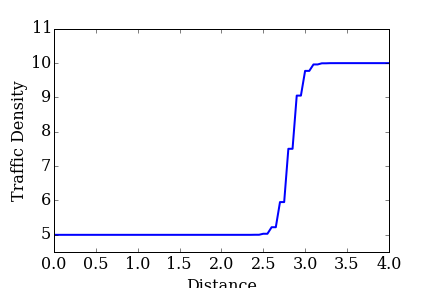
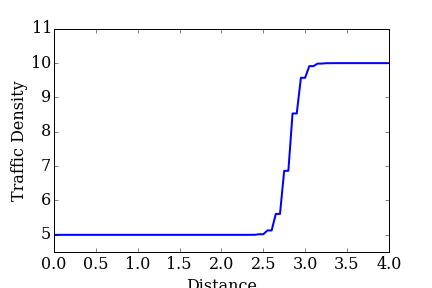
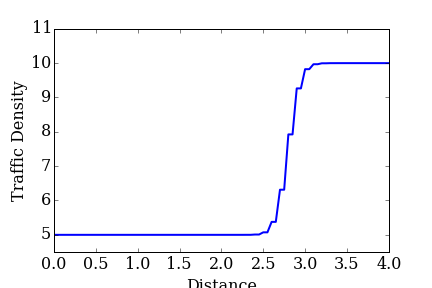
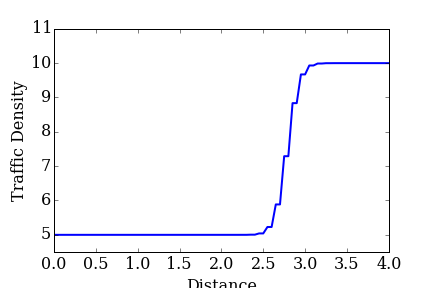
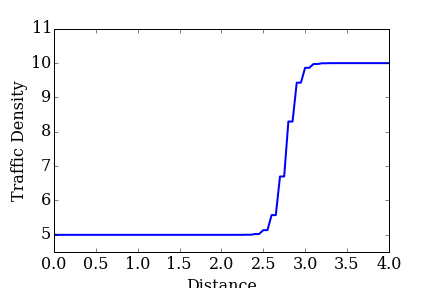
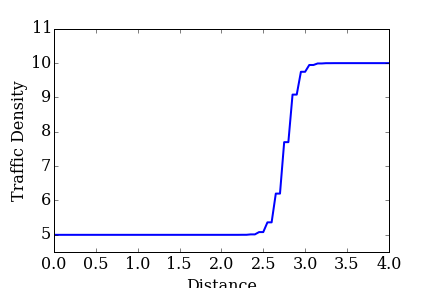
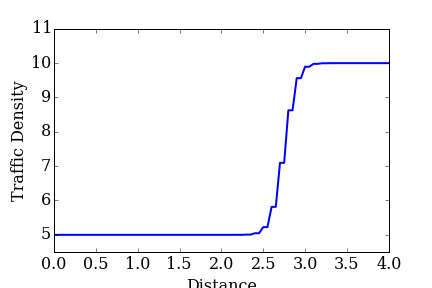
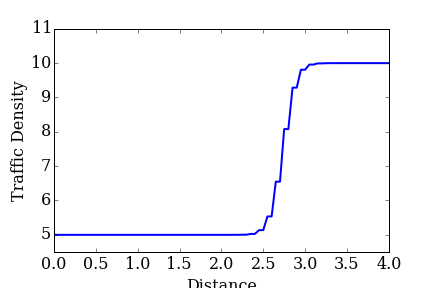
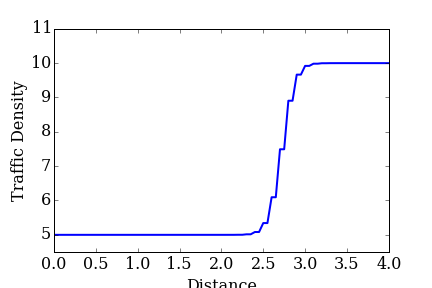
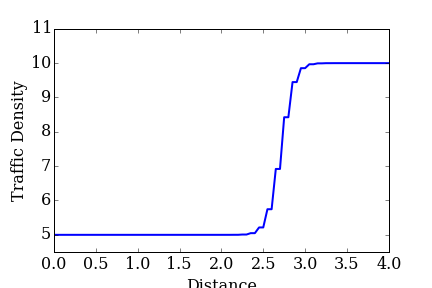
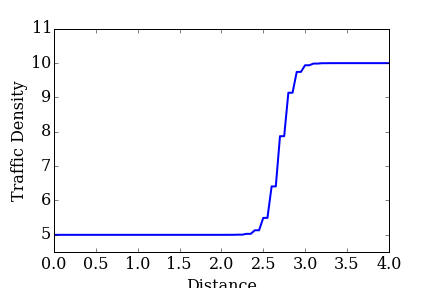
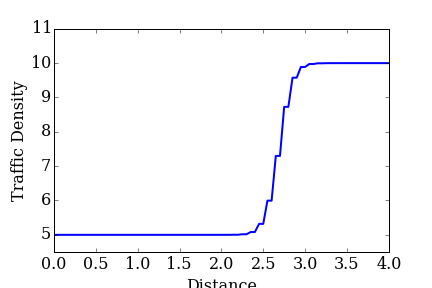
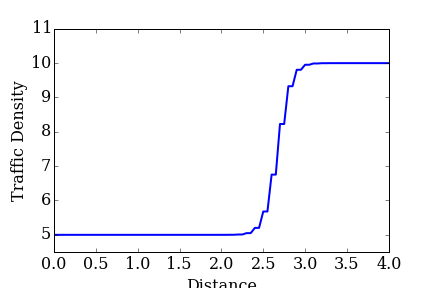
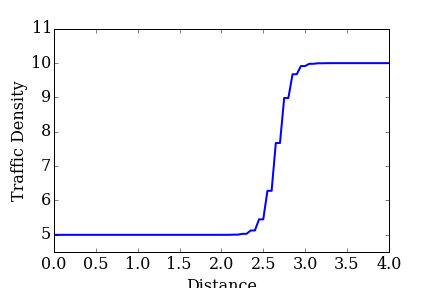
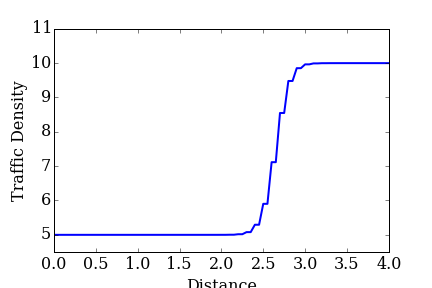
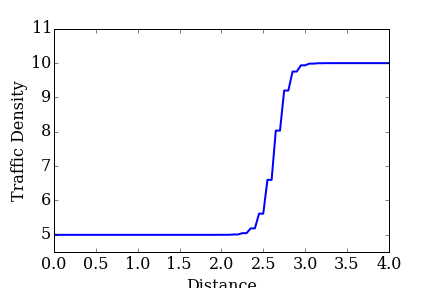
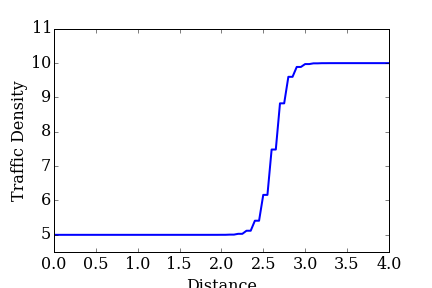
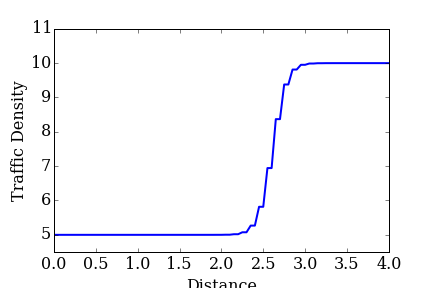

In [12]:
sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

In [18]:
def Jacobian(u_max, rho_max, rho):
    return u_max*(1-2*rho/rho_max)

def laxwendroff(rho, nt, dt, dx, rho_max, u_max):
    """Computes solution with Lax-Wendroff scheme
    
    Parameters:
        rho - density at current time step
        nt - number of time steps
        dt - time discretization
        dx - space discretization
        rho_max - maximum allowed car density
        u_max - max speed
        
    Return: 
        rho_n - density after nt time steps at each point x
    """
    
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[:,:] = rho.copy()
    
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        J = Jacobian(u_max, rho_max, rho)
        
        rho_n[t, 1:-1] = rho[1:-1] - dt/(2*dx)*(F[2:]-F[:-2])\
        + dt**2/(4*dx**2)*((J[2:]+J[1:-1])*(F[2:]-F[1:-1])\
                         -(J[1:-1]+J[:-2])*(F[1:-1]-F[:-2]))
        
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()
        
    return rho_n

In [19]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 1
dt = sigma*dx/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



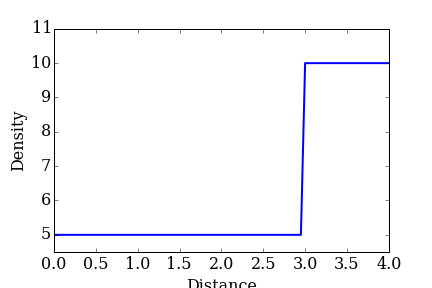
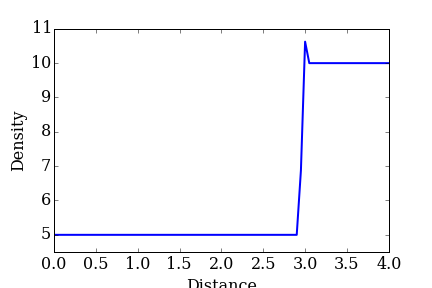
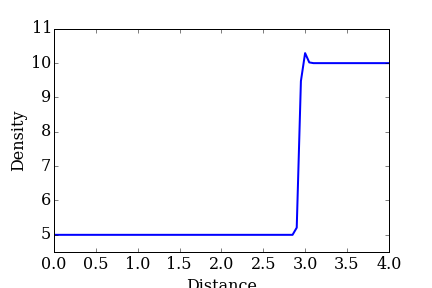
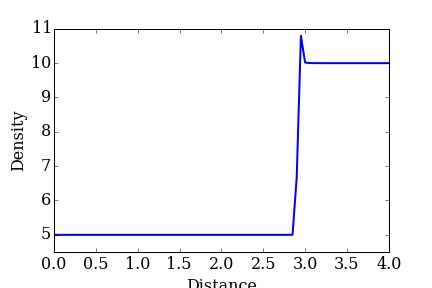
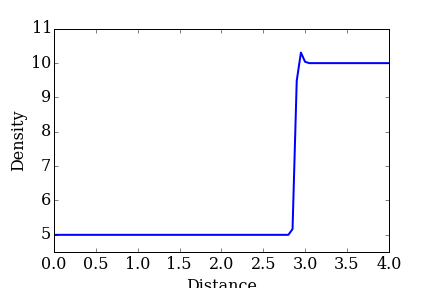
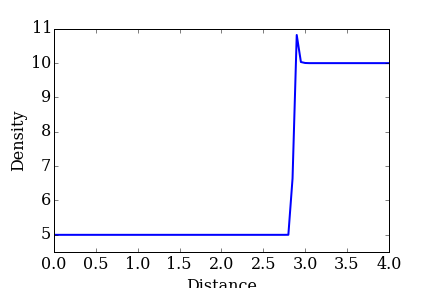
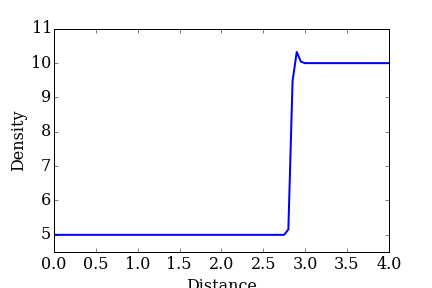
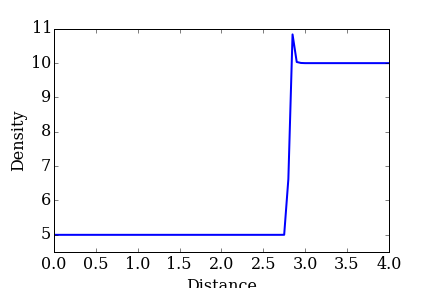
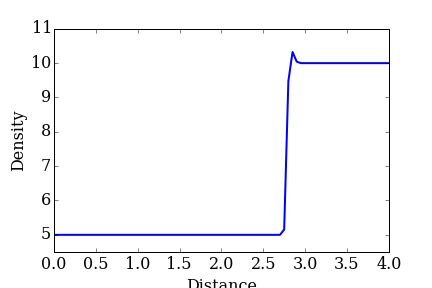
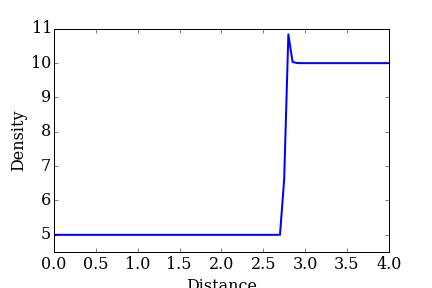
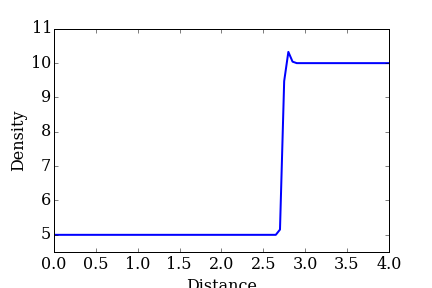
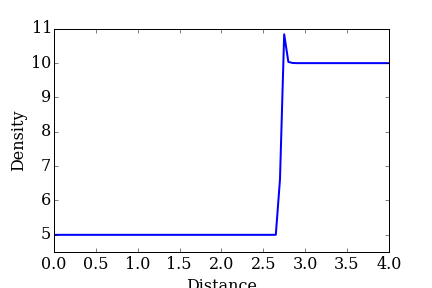
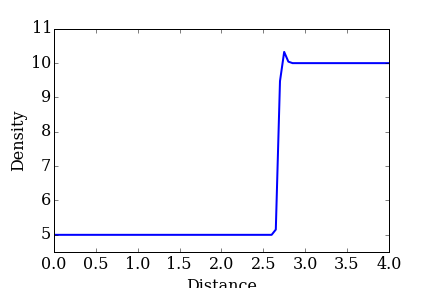
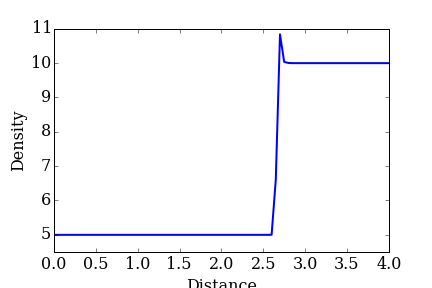
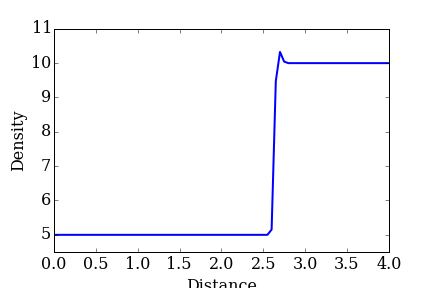
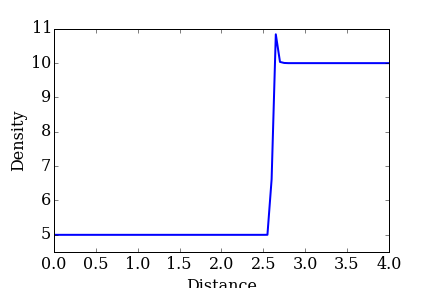
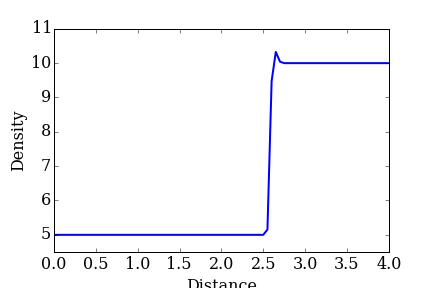
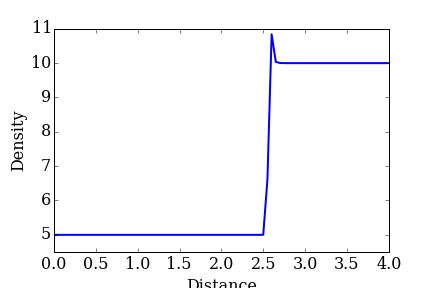
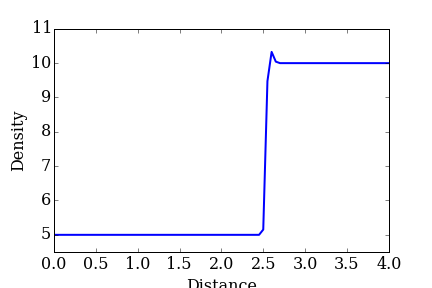
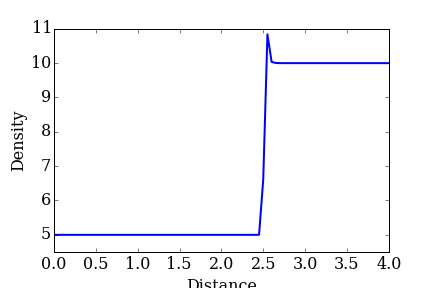
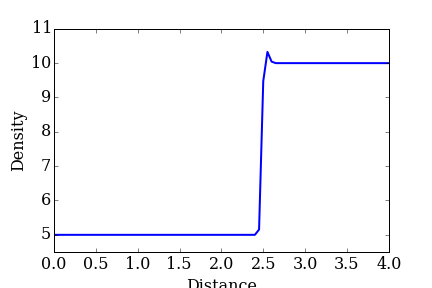
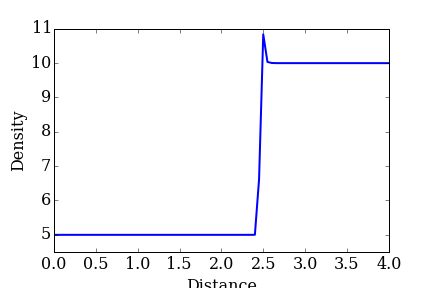
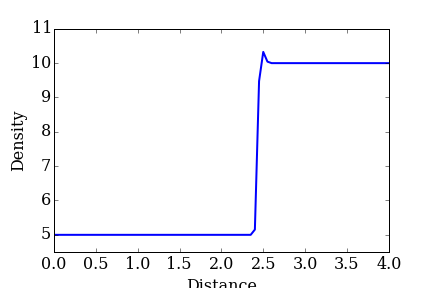
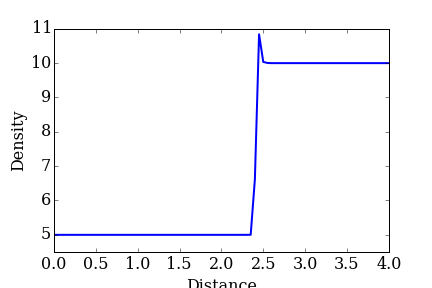
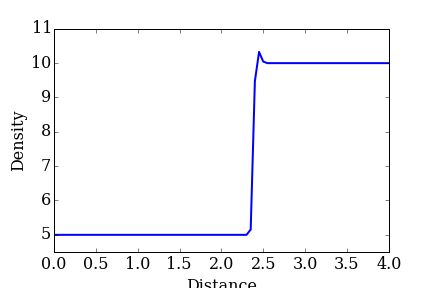
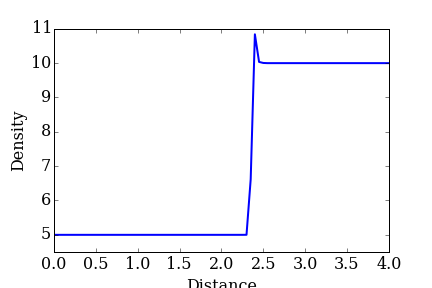
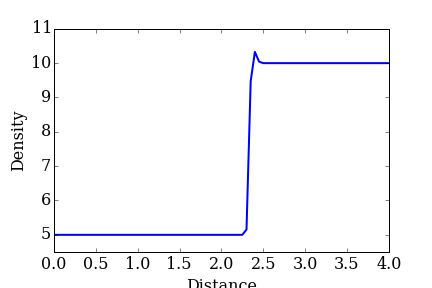
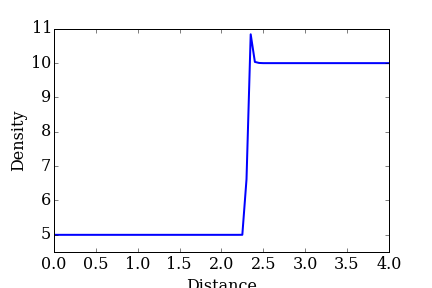
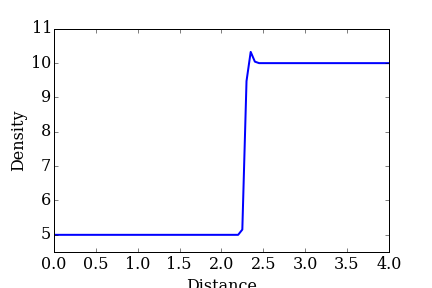
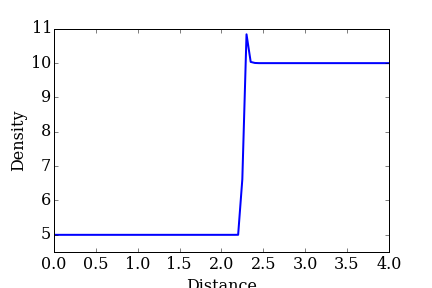

In [20]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(4.5,11.), xlabel=('Distance'), ylabel=('Density'))
line, = ax.plot([],[], lw=2)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



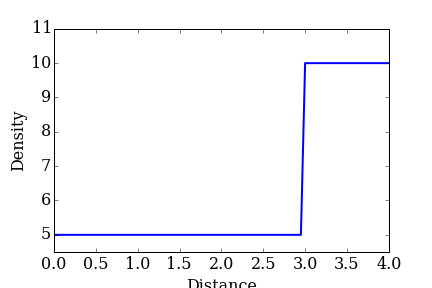
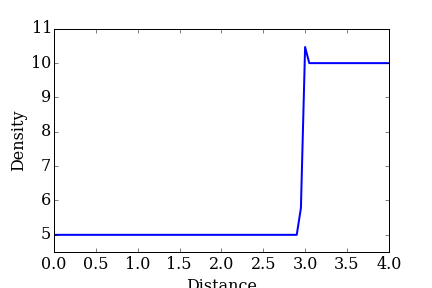
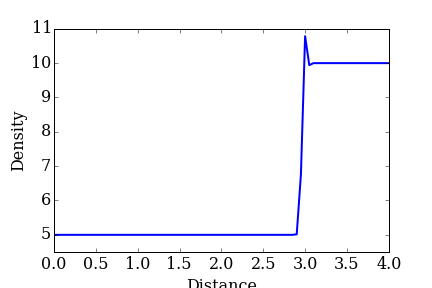
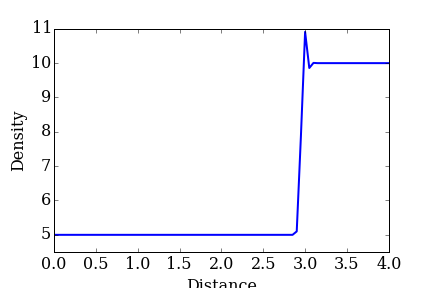
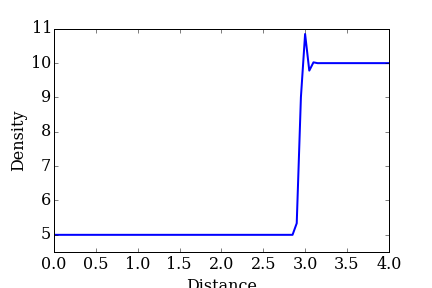
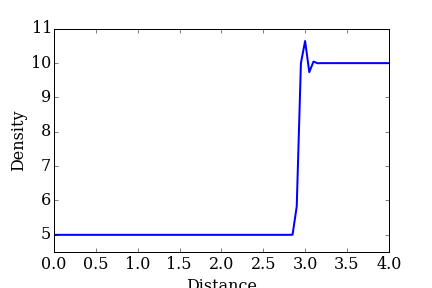
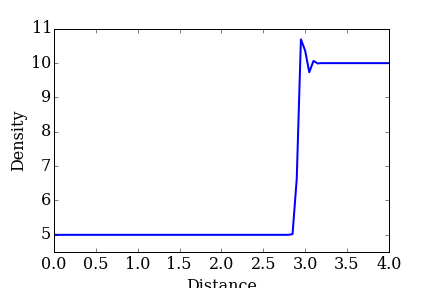
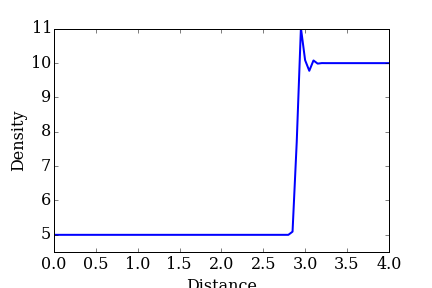
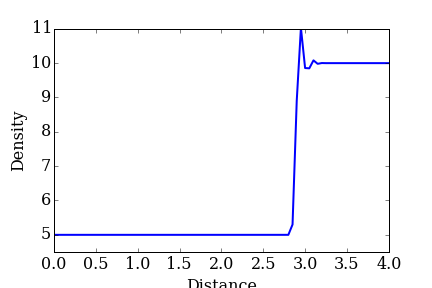
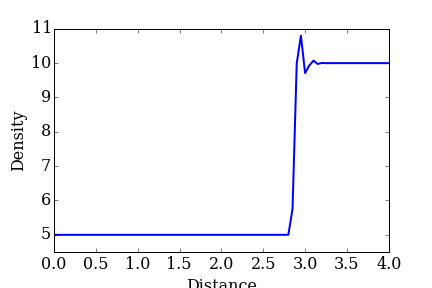
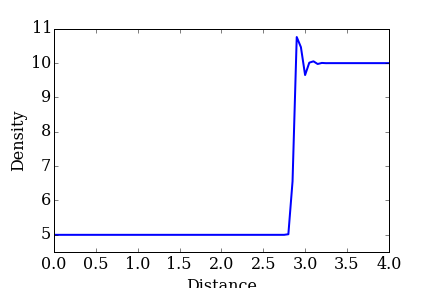
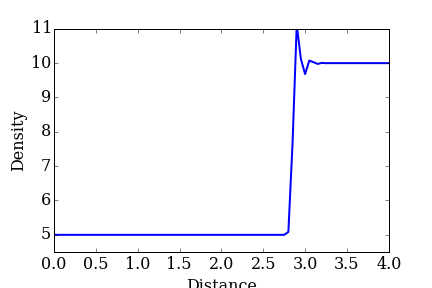
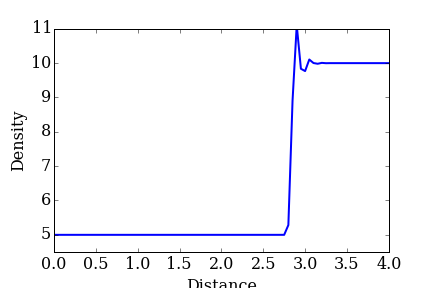
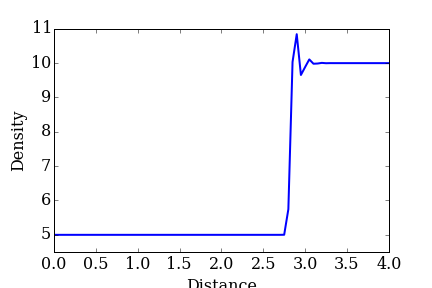
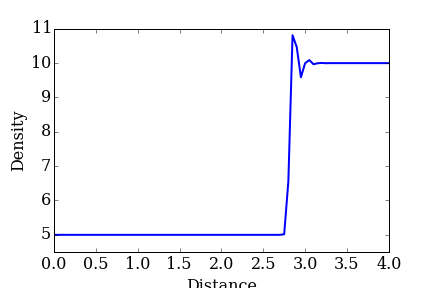
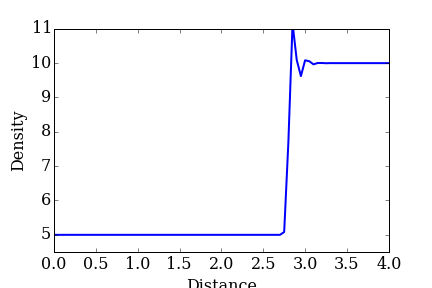
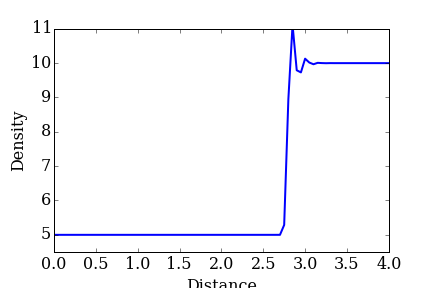
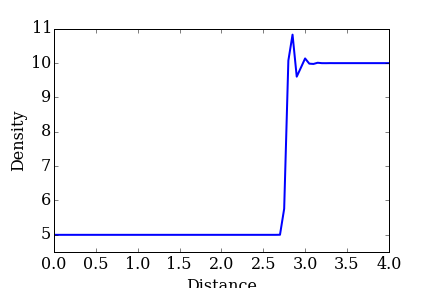
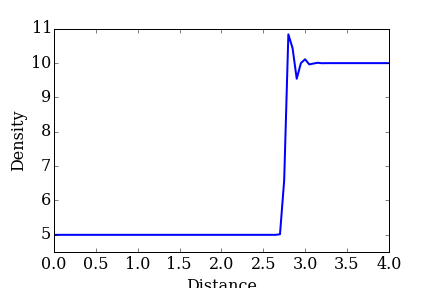
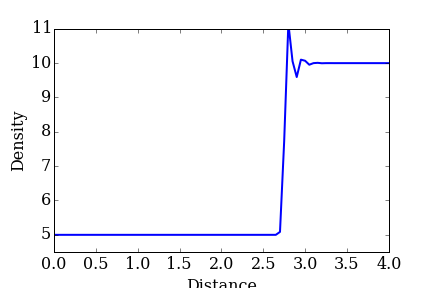
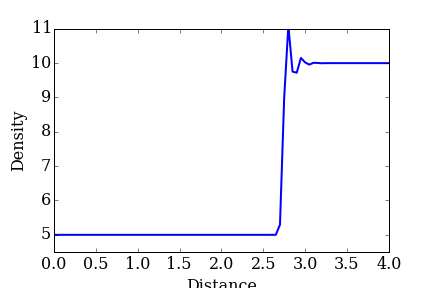
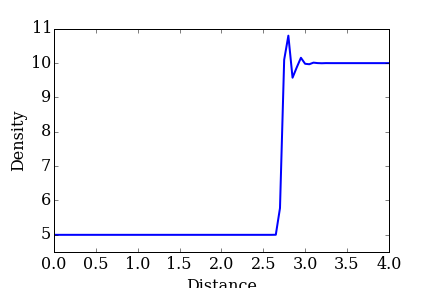
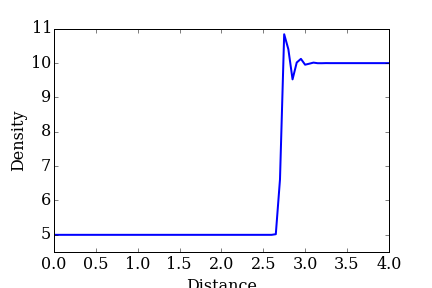
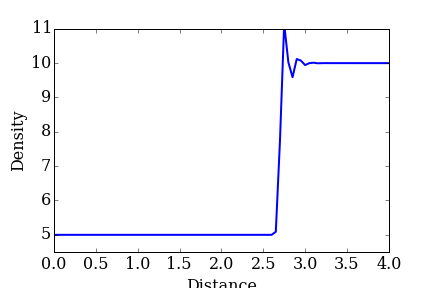
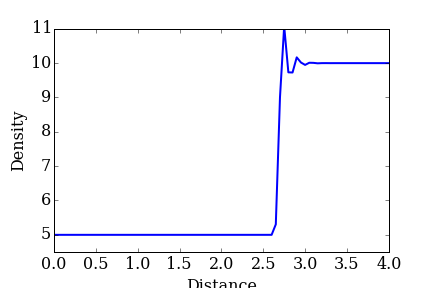
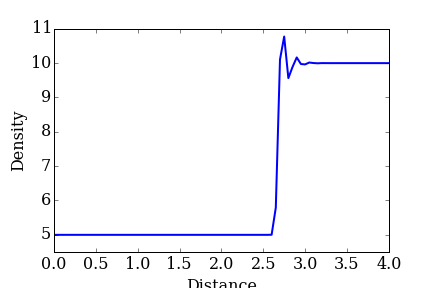
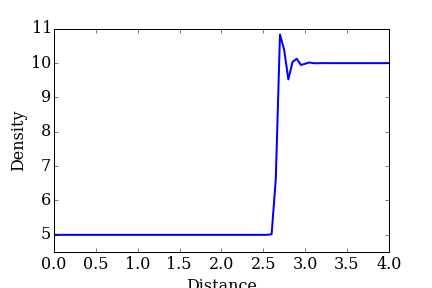
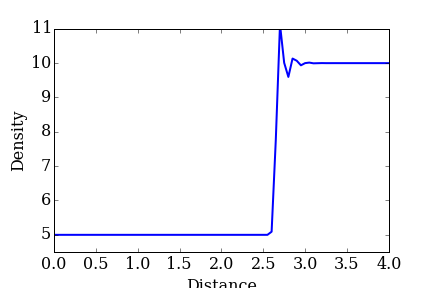
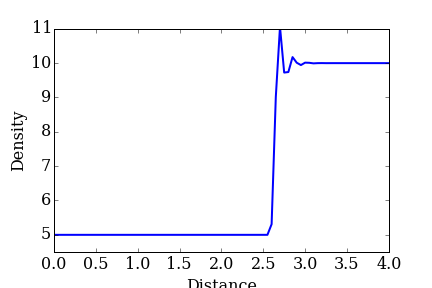
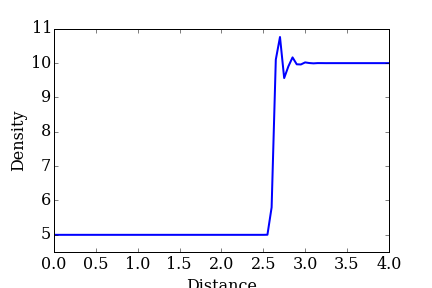

In [21]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dx/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(4.5,11),xlabel=('Distance'),ylabel=('Density'))
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


In [24]:
def maccormack(rho, nt, dt, dx, u_max, rho_max):
    """Computes solution with MacCormack scheme
    
    Parameters:
        rho - density at current time step
        nt - number of time steps
        dt - time discretiztion
        dx - space discretization
        rho_max - max density
        u_max - max speed
        
    Returns:
        rho_n - density after nt time steps at each point x
    """
    
    rho_n = numpy.zeros((nt, len(rho)))
    rho_star = numpy.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1, nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1] = rho[:-1] - dt/dx * (F[1:] - F[:-1])
        Fstar = computeF(u_max, rho_max, rho_star)
        rho_n[t, 1:] = 0.5*(rho[1:]+rho_star[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        rho = rho_n[t].copy()
    return rho_n


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



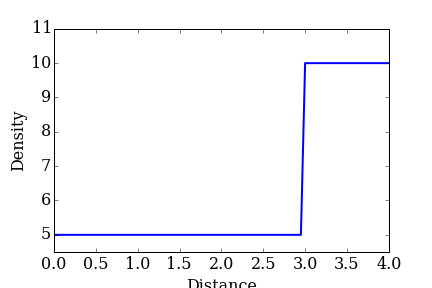
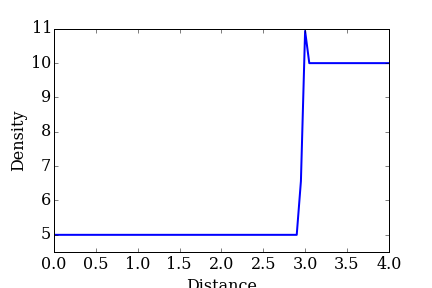
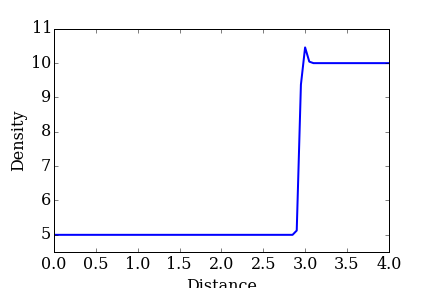
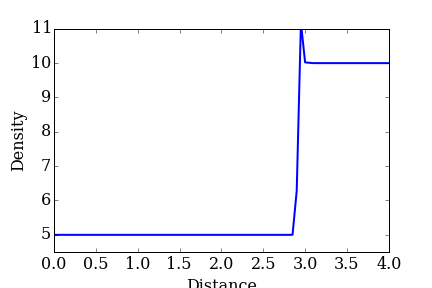
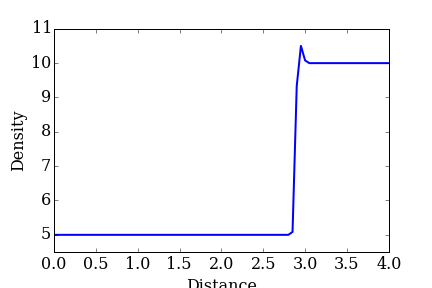
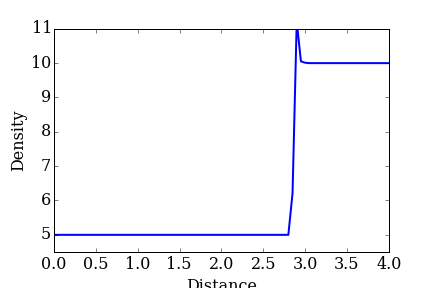
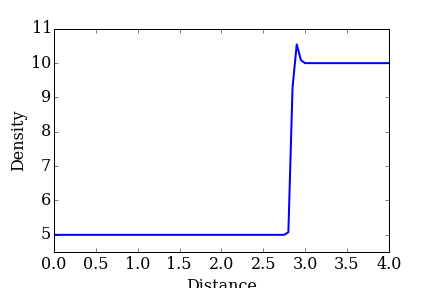
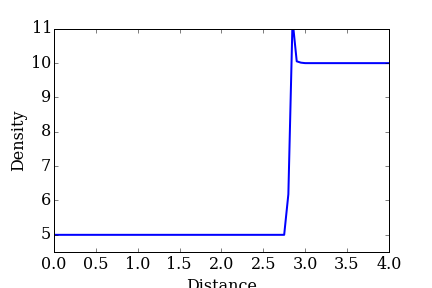
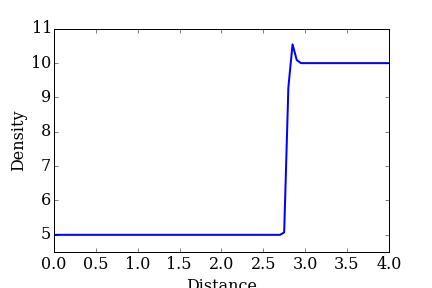
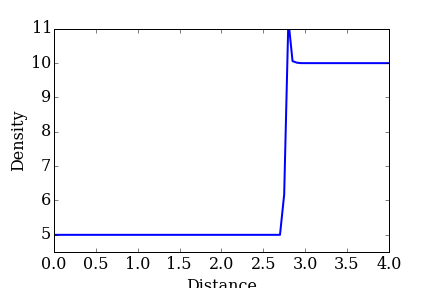
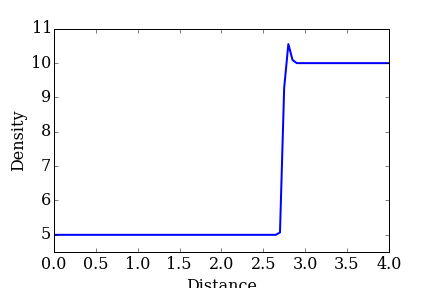
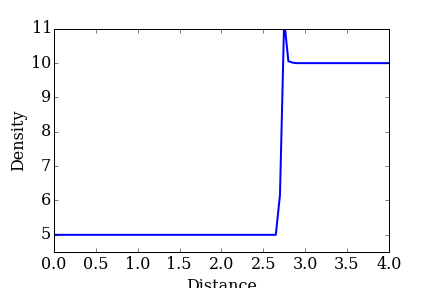
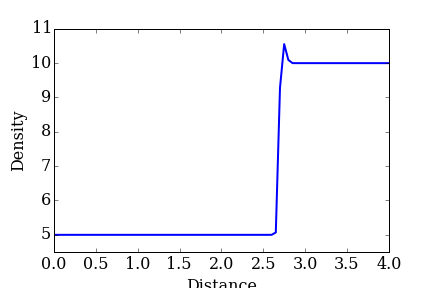
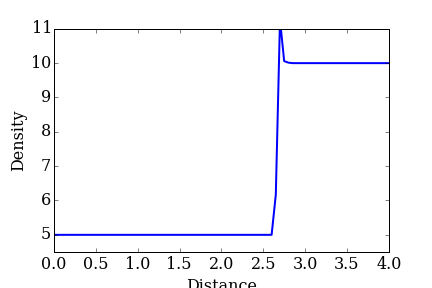
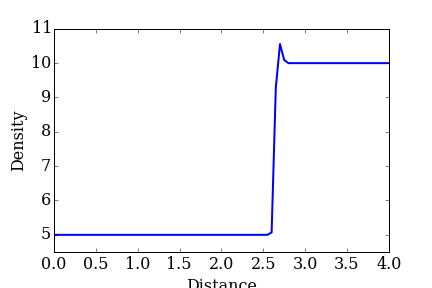
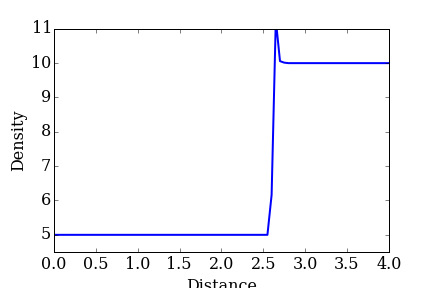
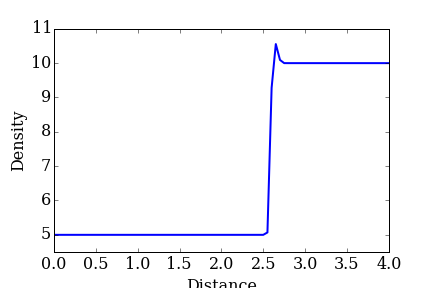
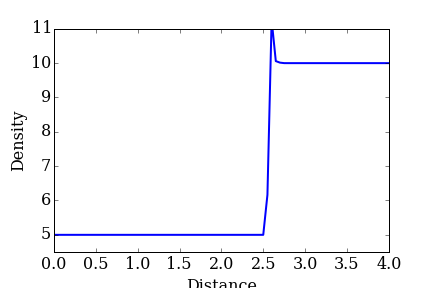
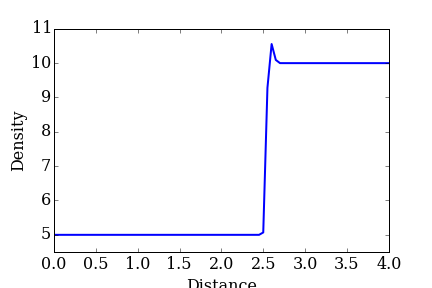
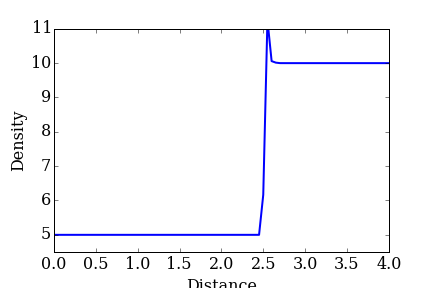
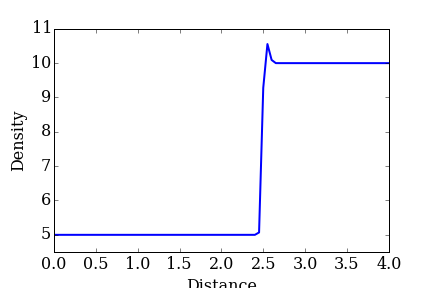
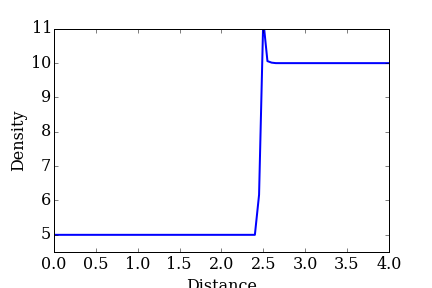
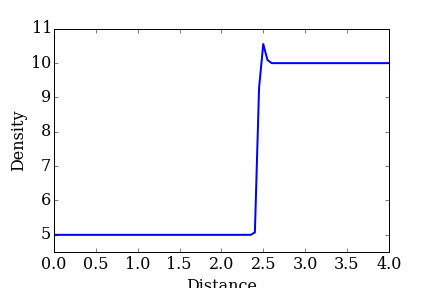
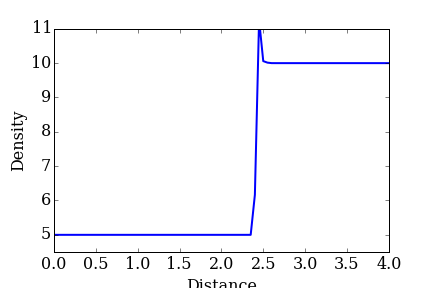
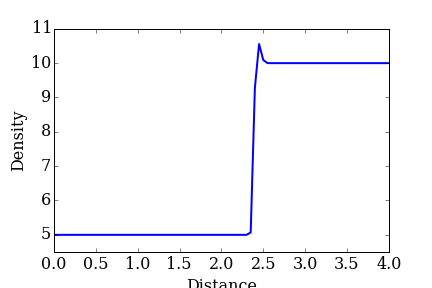
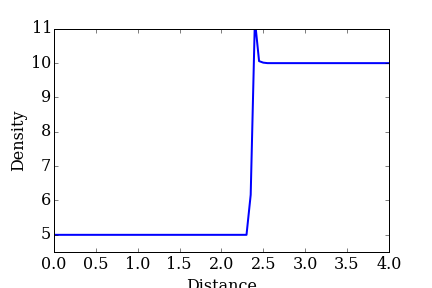
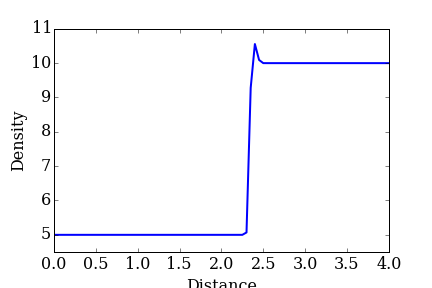
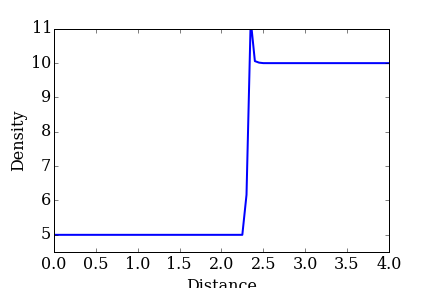
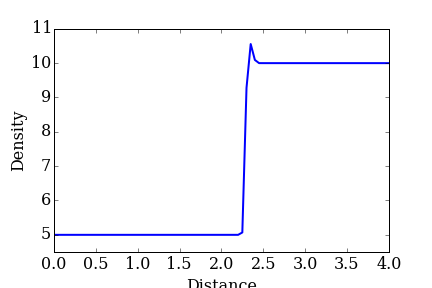
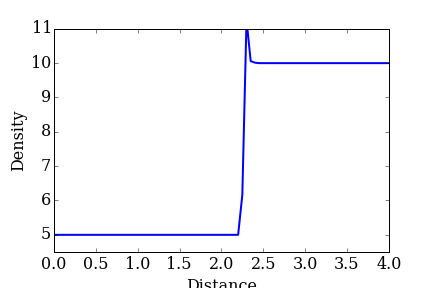

In [25]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 1.0
dt = sigma*dx/u_max

rho_n = maccormack(rho, nt, dt, dx, u_max, rho_max)
fig = pyplot.figure();

ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[], lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



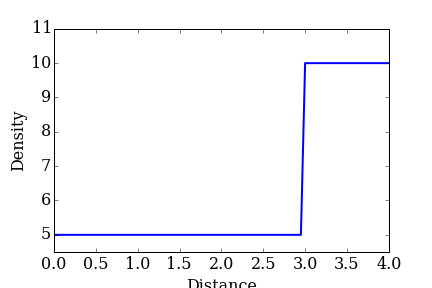
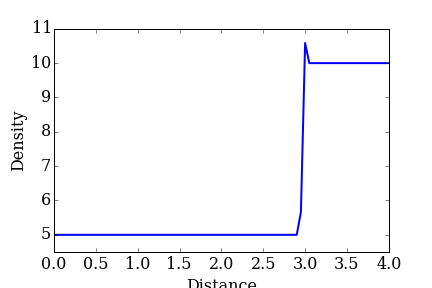
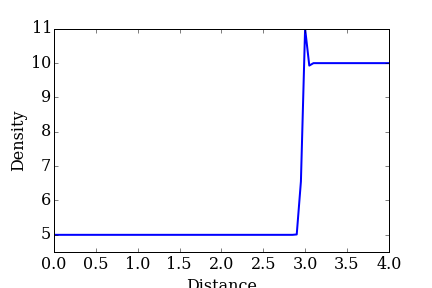
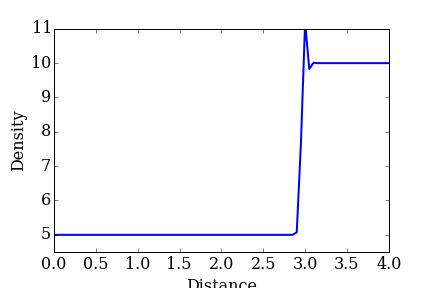
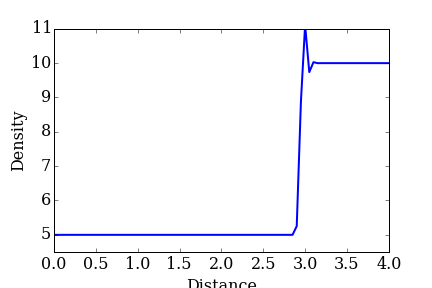
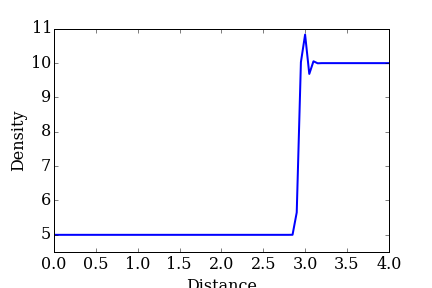
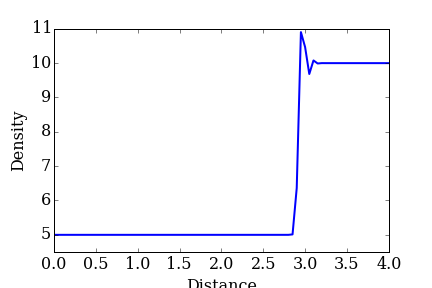
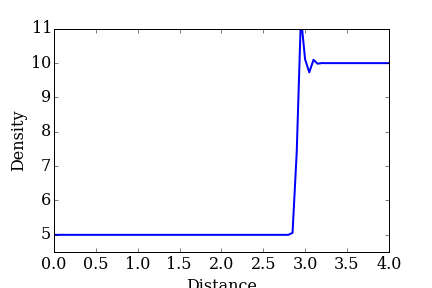
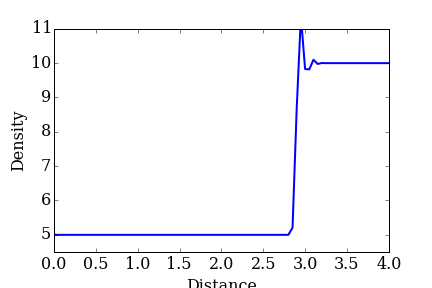
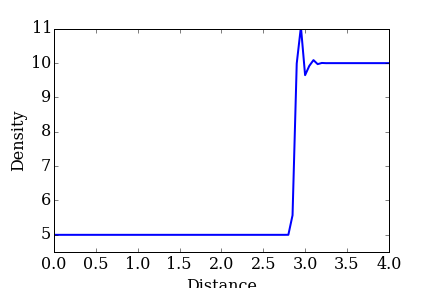
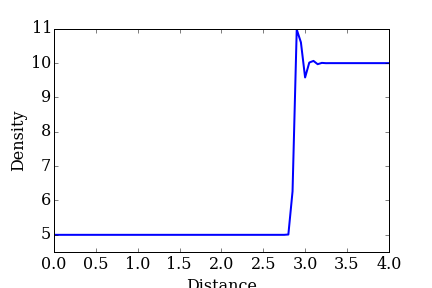
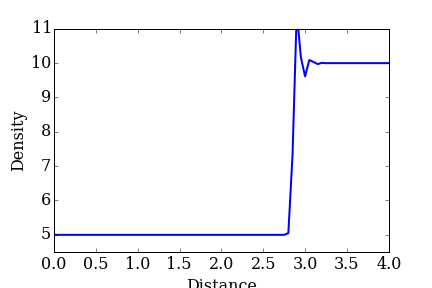
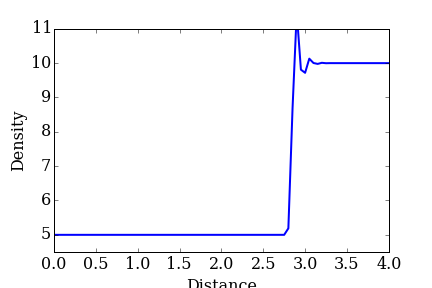
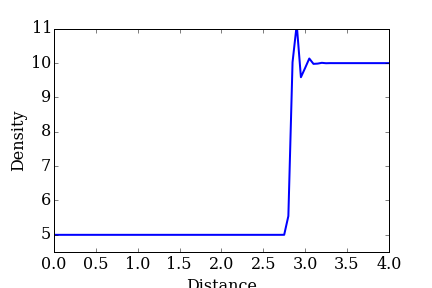
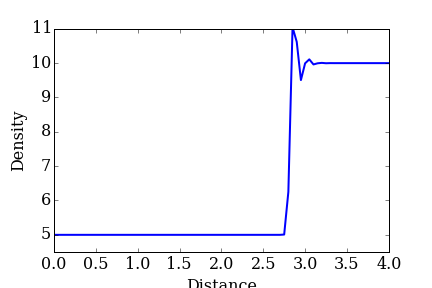
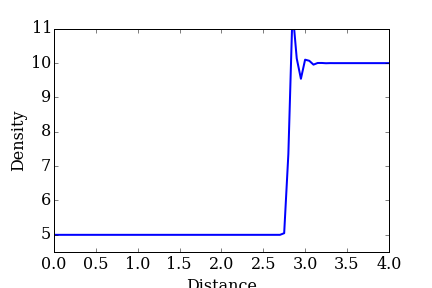
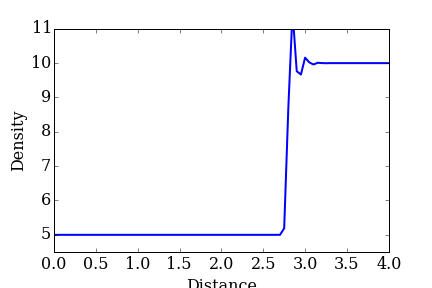
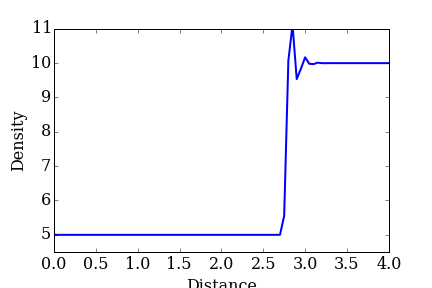
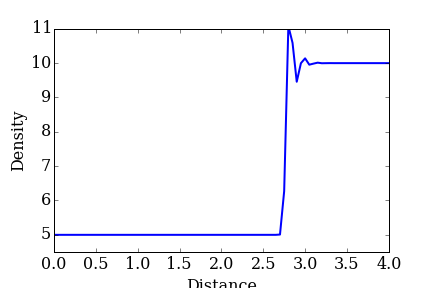
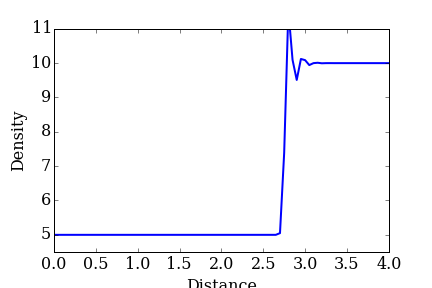
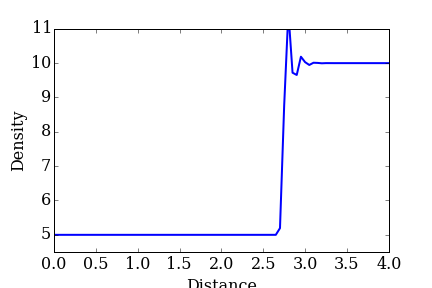
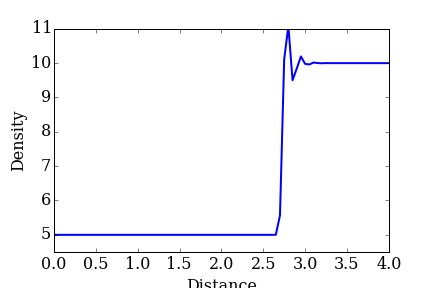
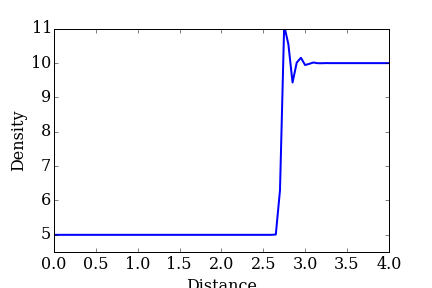
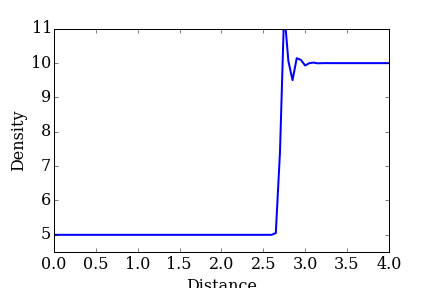
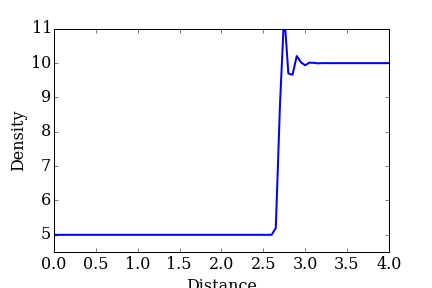
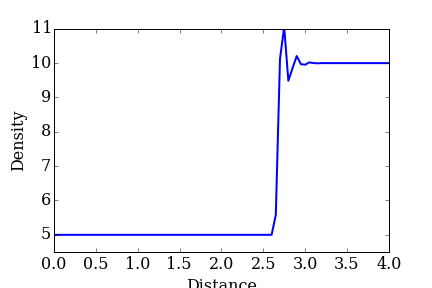
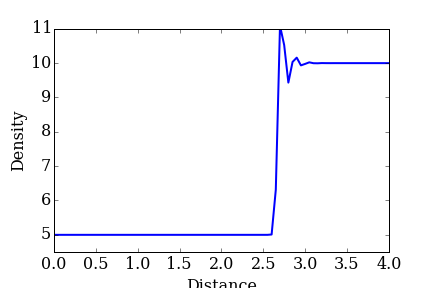
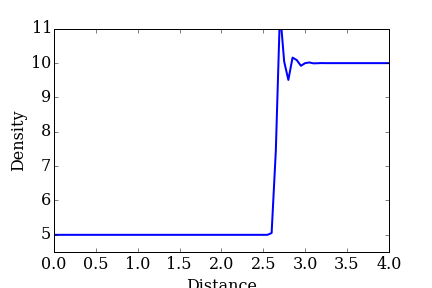
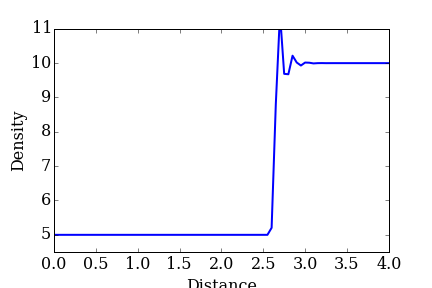
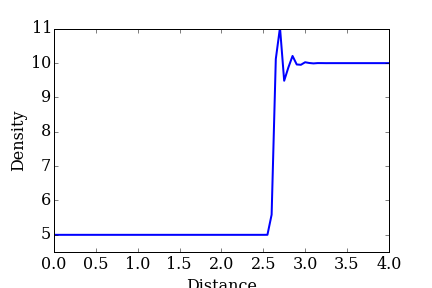

In [26]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dx/u_max

rho_n = maccormack(rho, nt, dt, dx, u_max, rho_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[], lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

Challenge Task

In [35]:
#Parameters, ICs
nx = 81
nt = 30
dx = 4/(nx-1)

rho_in = 1
rho_max = 10
u_max = 1
x = numpy.linspace(0,4,nx)

rho = rho_red_light(nx, rho_max, rho_in)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



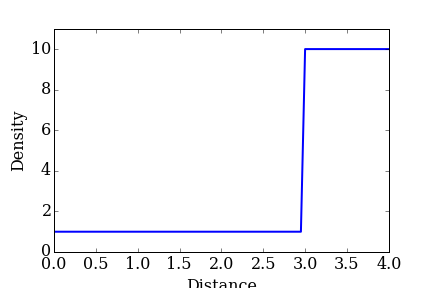
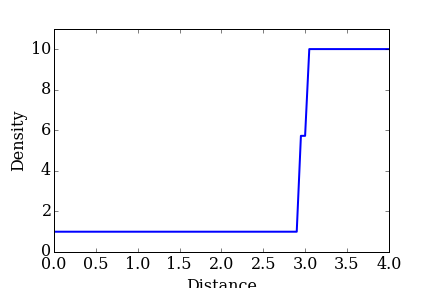
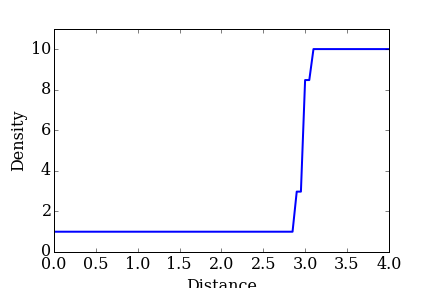
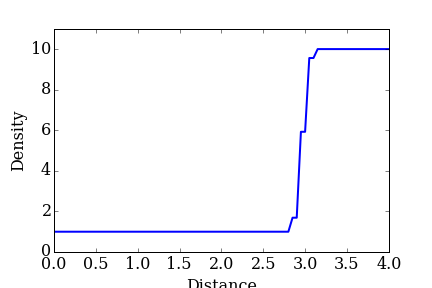
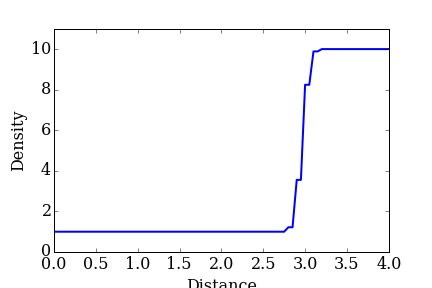
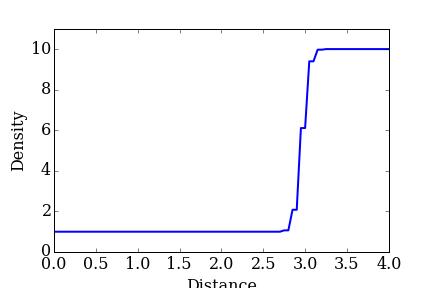
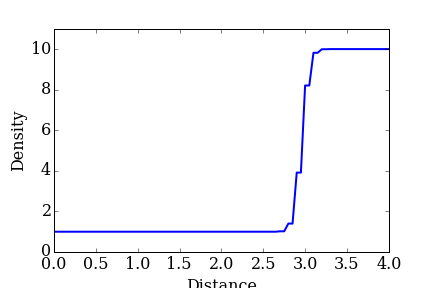
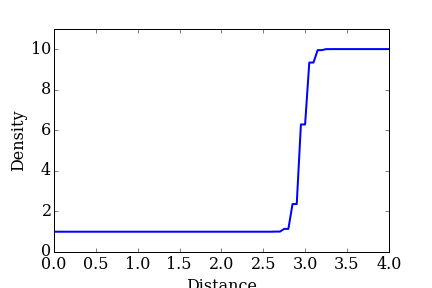
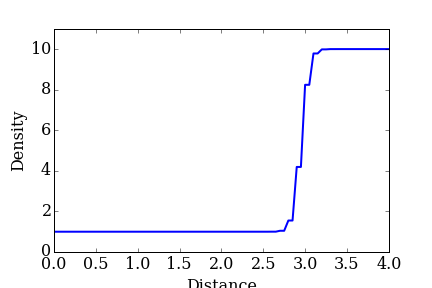
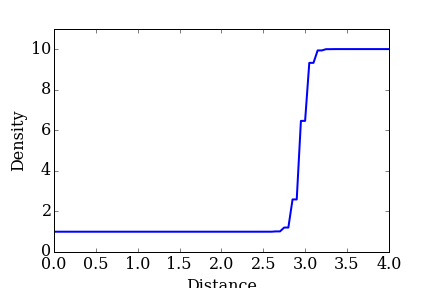
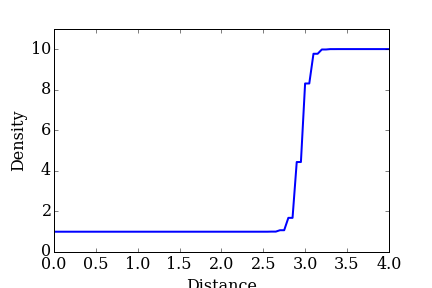
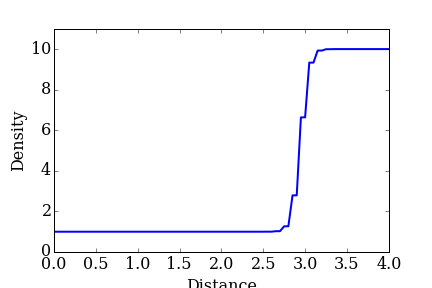
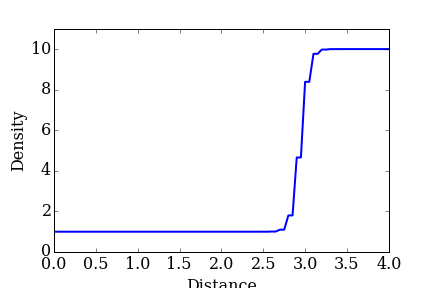
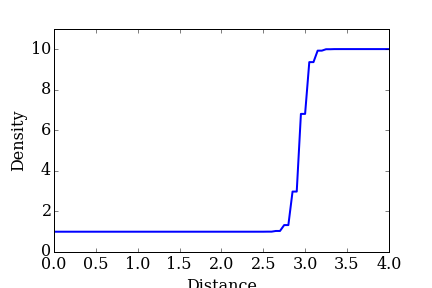
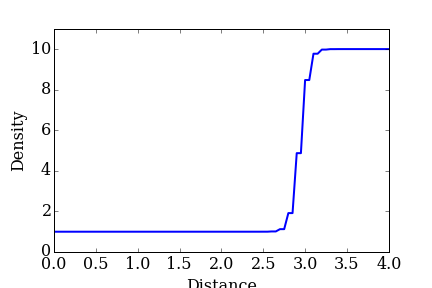
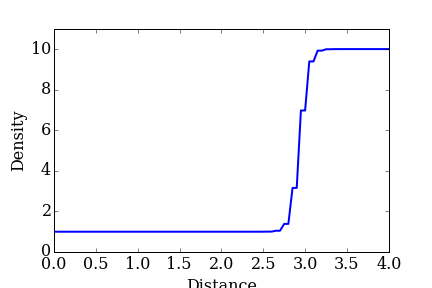
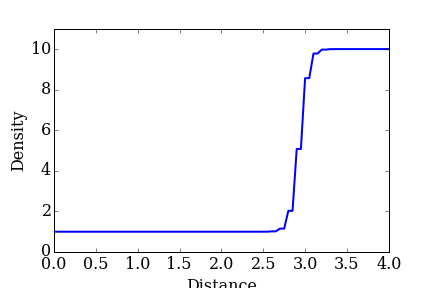
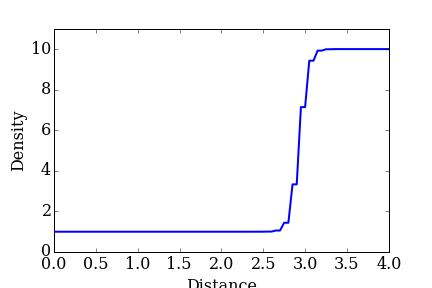
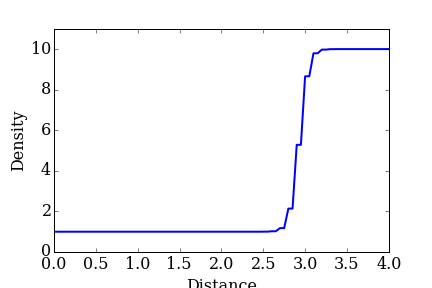
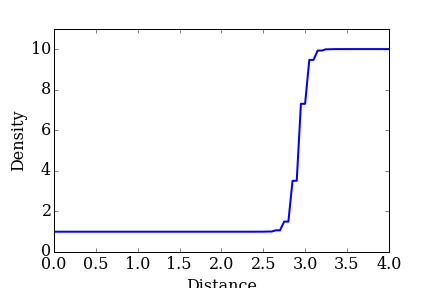
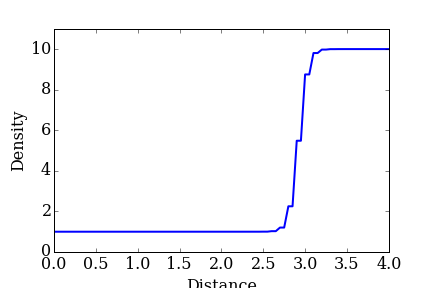
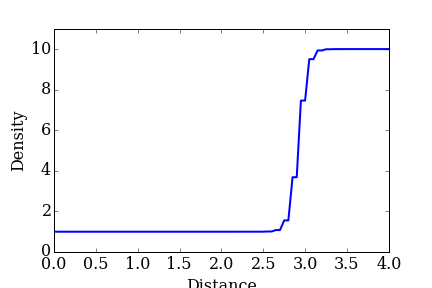
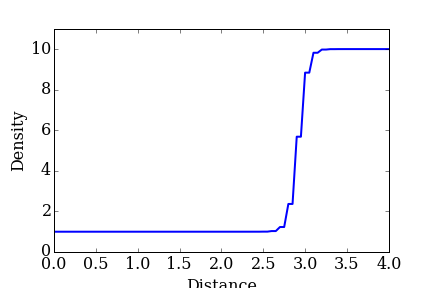
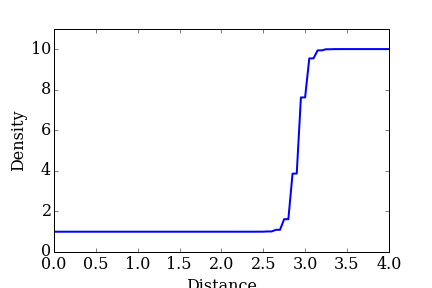
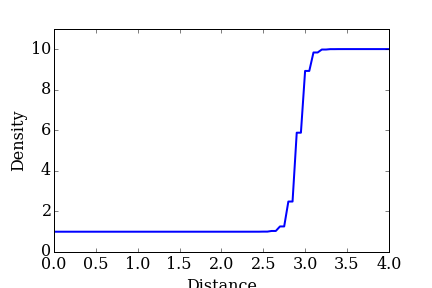
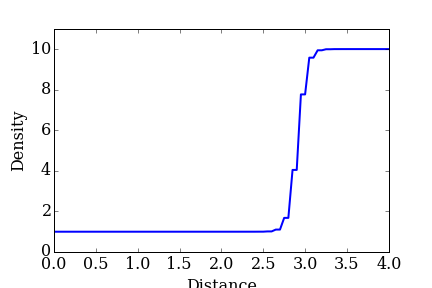
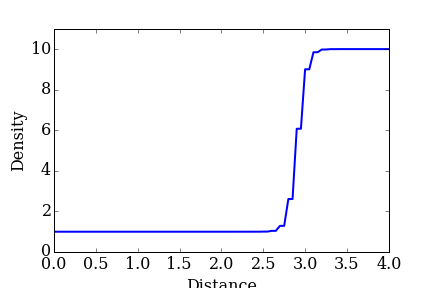
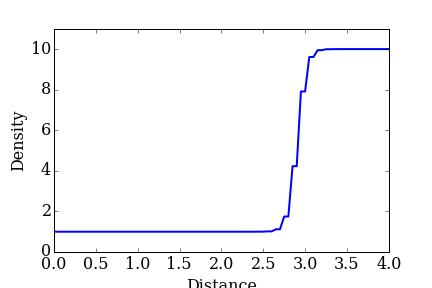
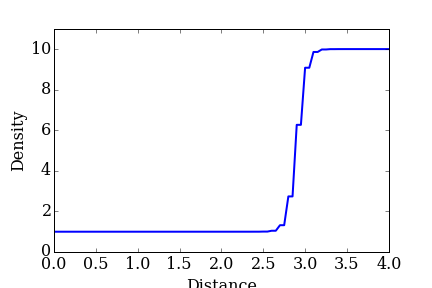
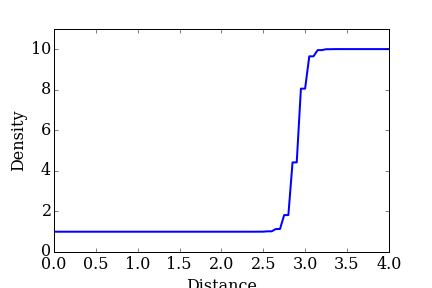

In [36]:
sigma = 0.5
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)
rho_n = laxfriedrichs(rho, nt, dt, dx, rho_max, u_max)
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



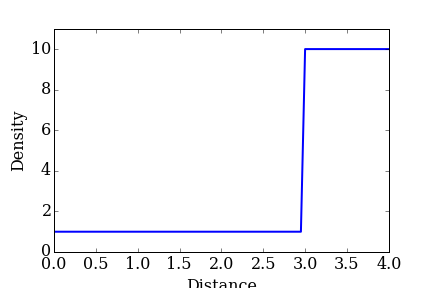
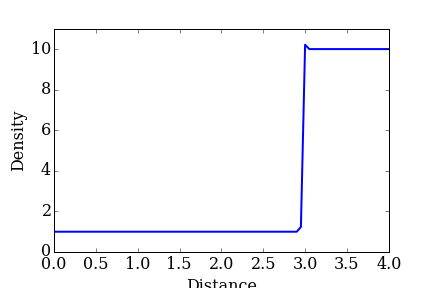
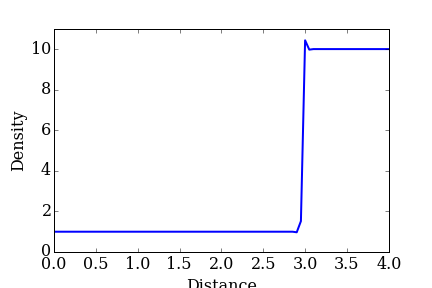
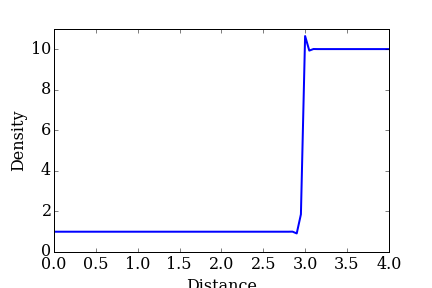
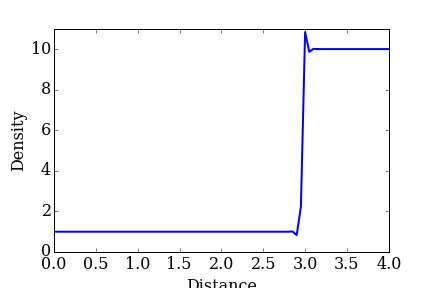
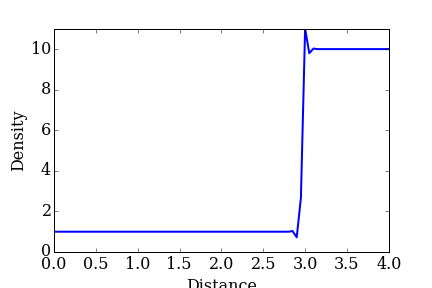
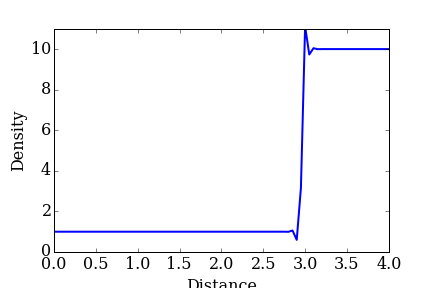
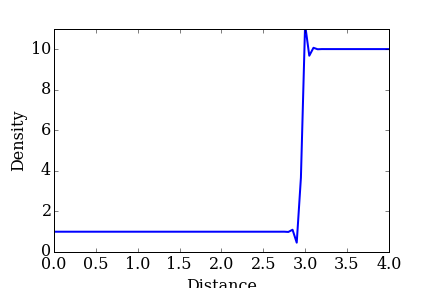
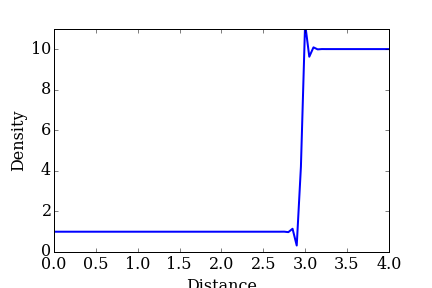
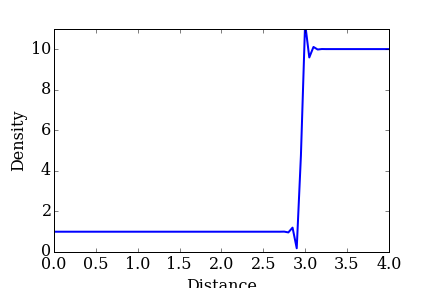
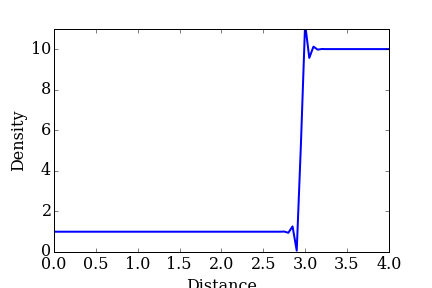
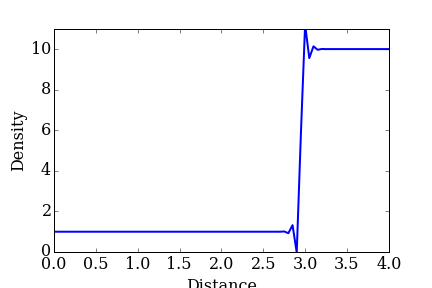
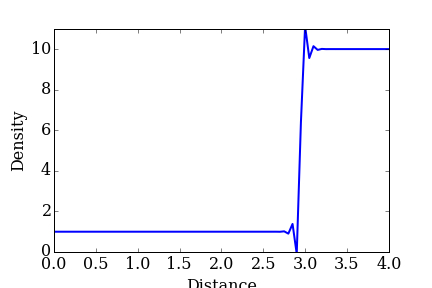
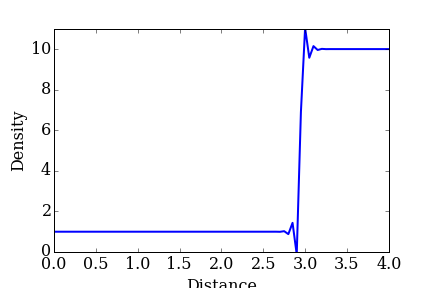
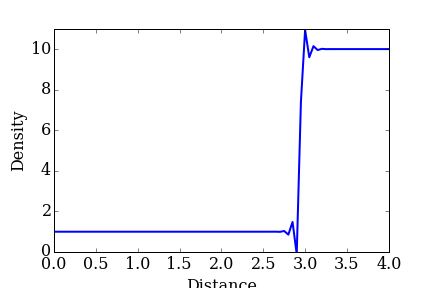
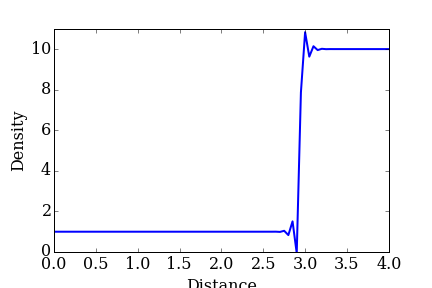
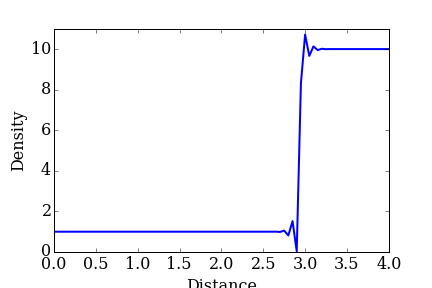
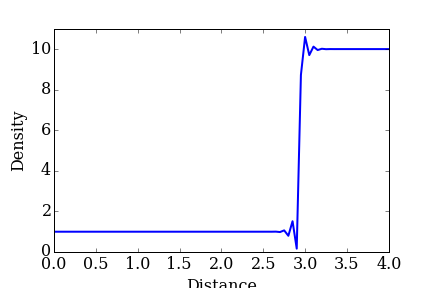
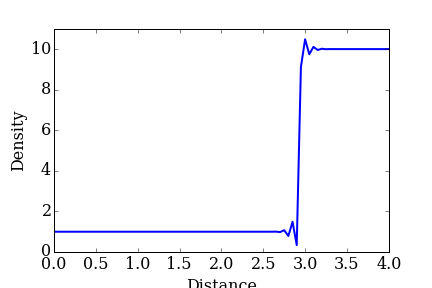
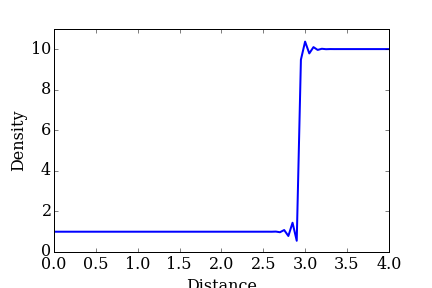
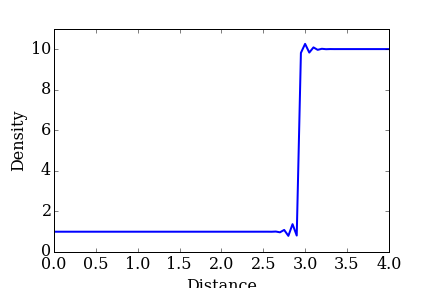
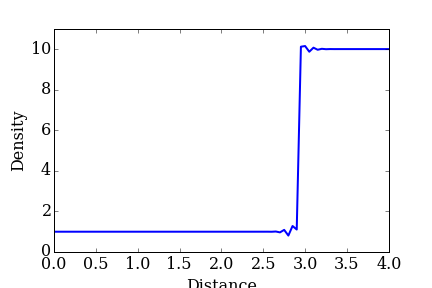
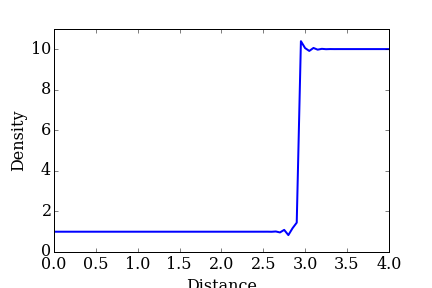
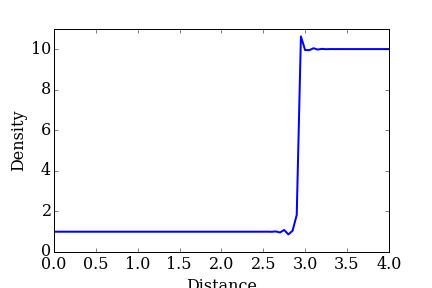
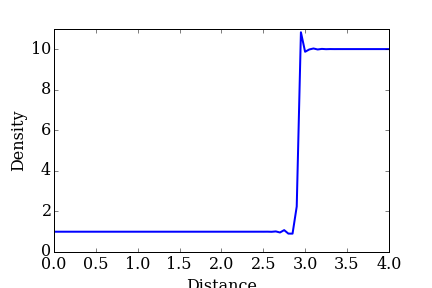
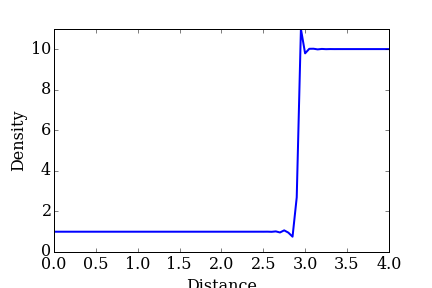
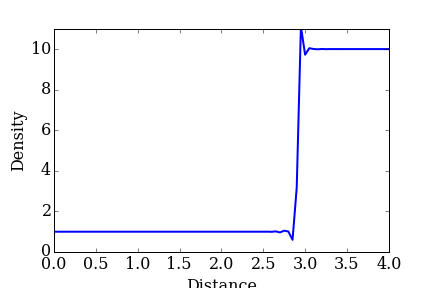
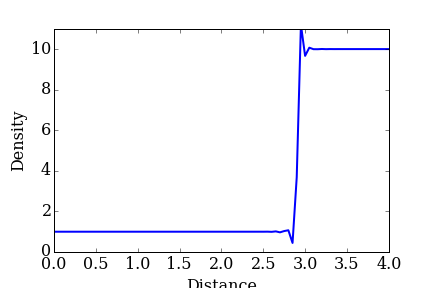
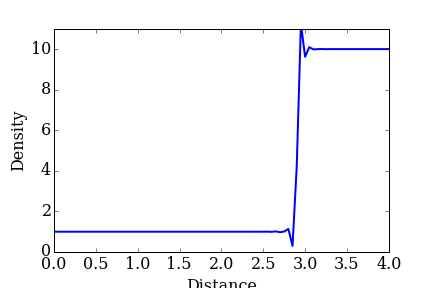
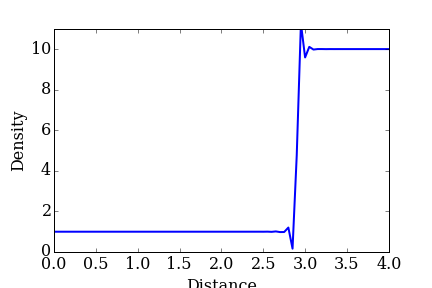

In [39]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dx/u_max
rho_n = laxwendroff(rho, nt, dt, dx, rho_max, u_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(0,11),xlabel=('Distance'),ylabel=('Density'))
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



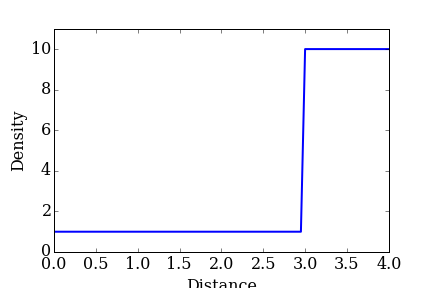
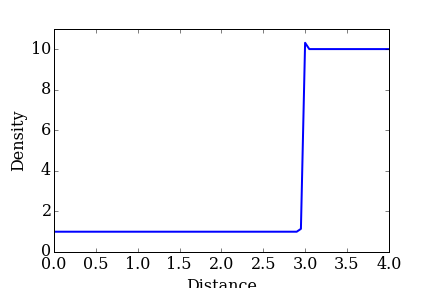
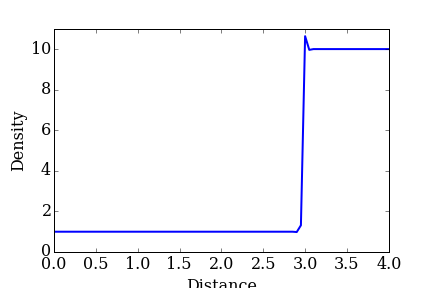
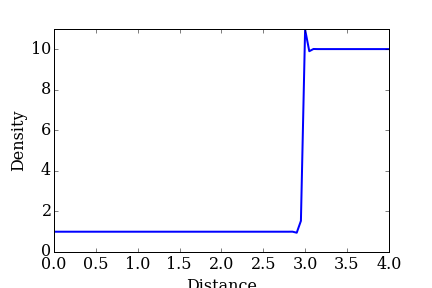
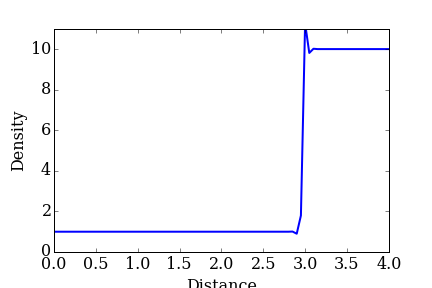
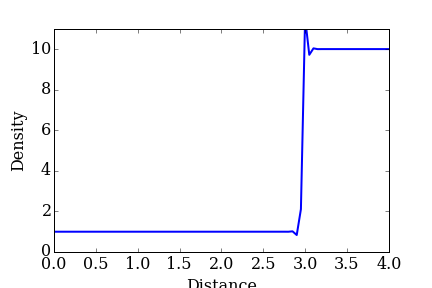
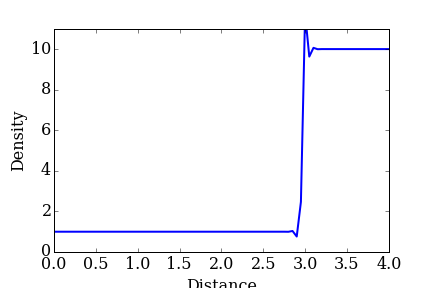
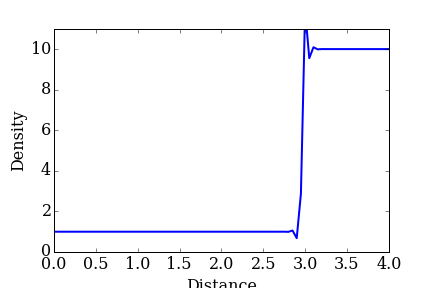
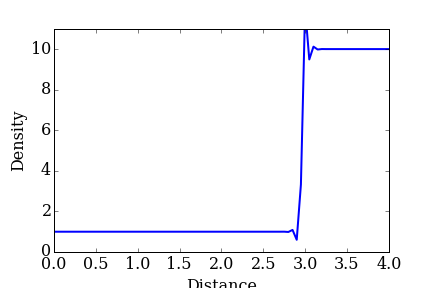
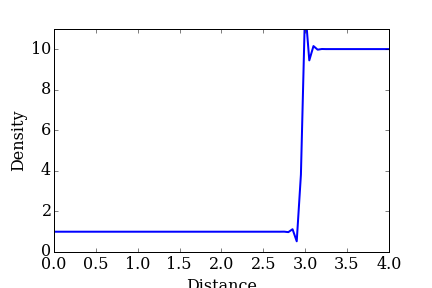
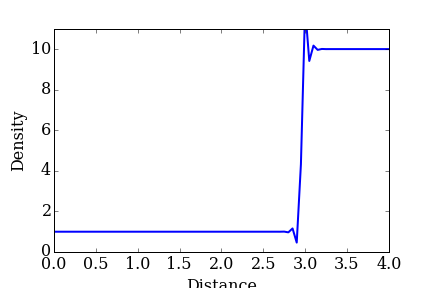
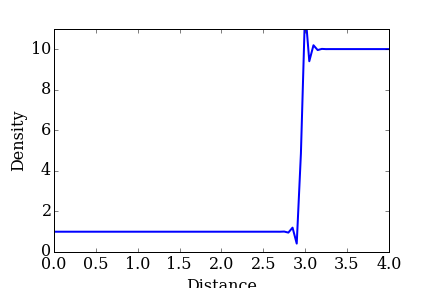
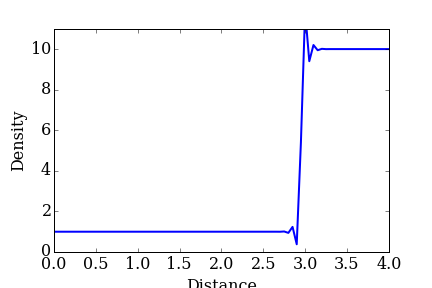
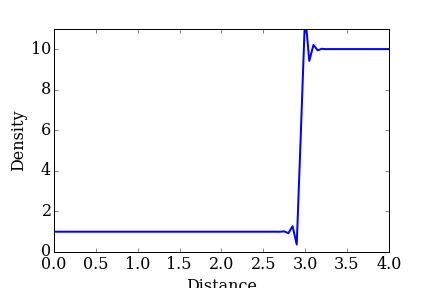
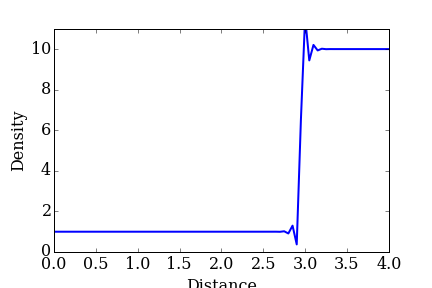
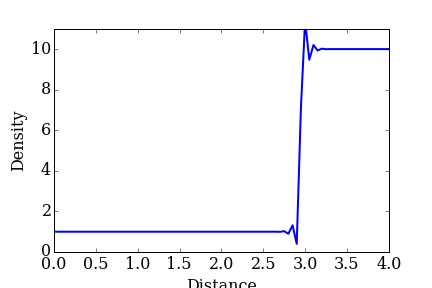
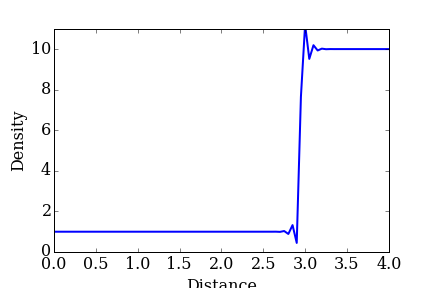
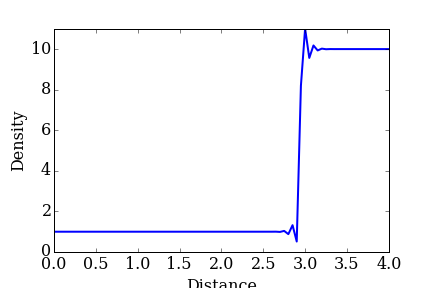
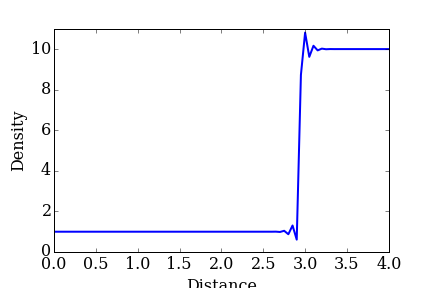
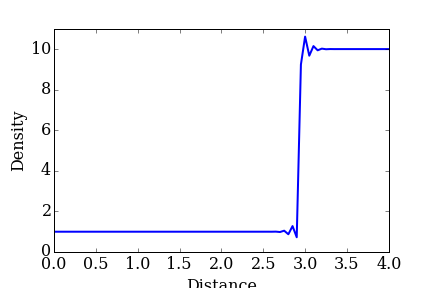
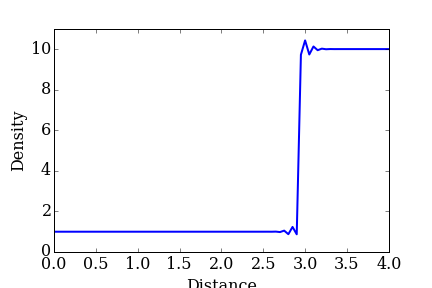
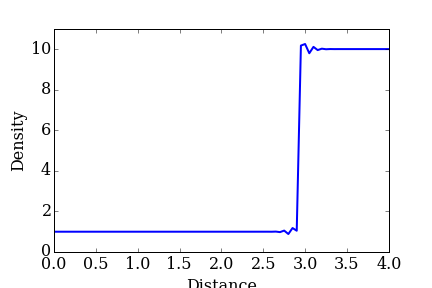
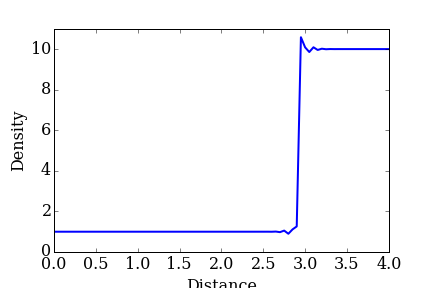
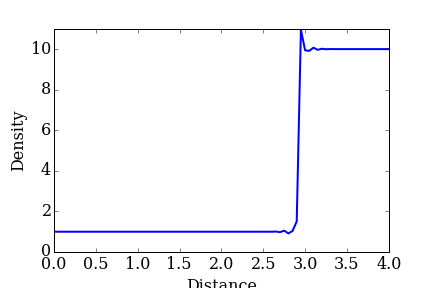
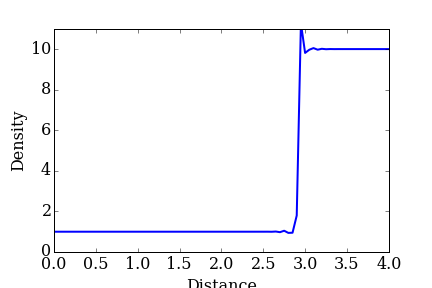
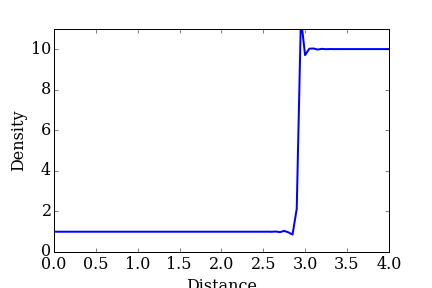
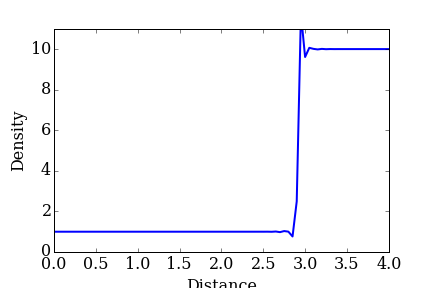
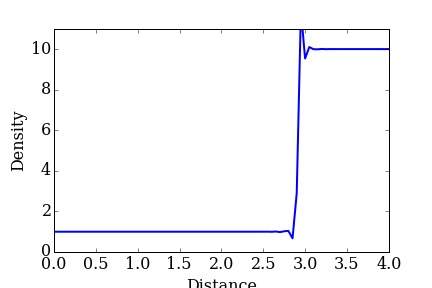
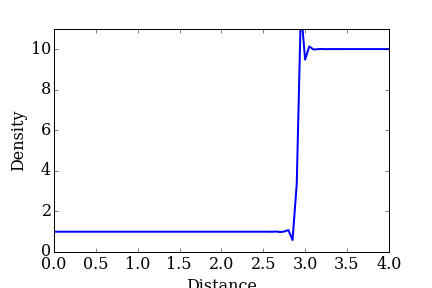
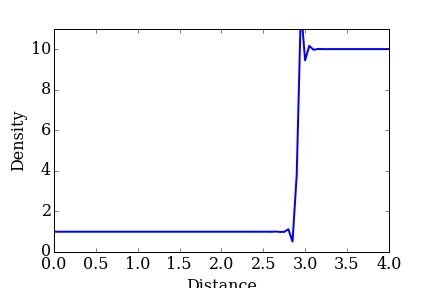

In [38]:
rho = rho_red_light(nx, rho_max, rho_in)
sigma = 0.5
dt = sigma*dx/u_max

rho_n = maccormack(rho, nt, dt, dx, u_max, rho_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(0,11),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[], lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')

As $\rho_{in}$ decreases, the velocity of the shock decreases. This is because the traffic flux, F, is dependent on the density. Then, as density decreases so does flux, which means $\rho^{n+1}$ will be closer to $\rho_n$